<a href="https://colab.research.google.com/github/damavandidonya/Sephora-Review-Analysis/blob/main/Group_project_Sephora_review_analysis_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Data processing

### **1.1 Loading Data**
- Imported **pandas, NumPy, and NLTK** for data processing.
- Mounted **Google Drive** to access datasets.
- Loaded:
  - **Product Information (`data_product_info.csv`)**
  - **Reviews in Chunks (`reviews_0-250.csv`, `reviews_250-500.csv`, etc.)**
- Concatenated all review datasets into a single **`reviews`** DataFrame.
- Checked **data structure (`.shape`)** and **first few rows (`.head()`)**.


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk

In [ ]:
# Importing the drive module from google.colab to access Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Loading the product information dataset
#data_product_info = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/product_info.csv', encoding="utf-8")

# Loading review datasets in chunks
#review1 = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/reviews_0-250.csv', encoding="utf-8")
# review2 = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/reviews_250-500.csv', encoding="utf-8")
# review3 = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/reviews_500-750.csv', encoding="utf-8")
# review4 = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/reviews_750-1250.csv', encoding="utf-8")
# review5 = pd.read_csv('/content/drive/MyDrive/DSO560 NLP/NLP Project/reviews_1250-end.csv', encoding="utf-8")

data_product_info = pd.read_csv('/content/product_info.csv', encoding="utf-8")
review1 = pd.read_csv('/content/reviews_0-250.csv', encoding="utf-8")
review2 = pd.read_csv('/content/reviews_250-500.csv', encoding="utf-8")
review3 = pd.read_csv('/content/reviews_500-750.csv', encoding="utf-8")
review4 = pd.read_csv('/content/reviews_750-1250.csv', encoding="utf-8")
review5 = pd.read_csv('/content/reviews_1250-end.csv', encoding="utf-8")

# Concatenating all review datasets into a single DataFrame
reviews = pd.concat([review1, review2, review3, review4, review5])
# reviews = review1

# Checking the shape of the final reviews dataset (number of rows, number of columns)
reviews.shape

<ipython-input-3-02dc5075f874>:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review1 = pd.read_csv('/content/reviews_0-250.csv', encoding="utf-8")
<ipython-input-3-02dc5075f874>:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review4 = pd.read_csv('/content/reviews_750-1250.csv', encoding="utf-8")
<ipython-input-3-02dc5075f874>:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review5 = pd.read_csv('/content/reviews_1250-end.csv', encoding="utf-8")


(1094411, 19)

In [ ]:
# Display the first five rows of the 'reviews' DataFrame
reviews.head()

Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0           0   1741593524       5             1.0          1.0   
1           1  31423088263       1             0.0          NaN   
2           2   5061282401       5             1.0          NaN   
3           3   6083038851       5             1.0          NaN   
4           4  47056667835       5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         0   
4                     0                         0                         0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “Citrus Clean Bal...   
1      2023-03-21  I bought this lip mask after reading the revie...   
2      2023-03-21  My review title says it all! I get so excited ...   
3      2023-03-20  I’ve always loved this formula for a long time...   
4      2023-03-20  If you have dry cracked lips, this is a must h...   

                       review_title skin_tone eye_color    skin_type  \
0  Taught me how to double cleanse!       NaN     brown          dry   
1                      Disappointed       NaN       NaN          NaN   
2              New Favorite Routine     light     brown          dry   
3   Can't go wrong with any of them       NaN     brown  combination   
4                   A must have !!!     light     hazel  combination   

  hair_color product_id                                       product_name  \
0      black    P504322                     Gentle Hydra-Gel Face Cleanser   
1        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
2     blonde    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
3      black    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
4        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   

  brand_name  price_usd  
0   NUDESTIX       19.0  
1    LANEIGE       24.0  
2    LANEIGE       24.0  
3    LANEIGE       24.0  
4    LANEIGE       24.0

In [ ]:
# Display the first five rows of the 'data_product_info' DataFrame
data_product_info.head()

product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... online_only out_of_stock  sephora_exclusive  \
0             NaN  ...           1            0                  0   
1  3.4 oz/ 100 mL  ...           1            0                  0   
2  3.4 oz/ 100 mL  ...           1            0                  0   
3  3.4 oz/ 100 mL  ...           1            0                  0   
4  3.4 oz/ 100 mL  ...           1            0                  0   

                                          highlights  primary_category  \
0  ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...         Fragrance   
1  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
2  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
3  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
4  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   

   secondary_category  tertiary_category  child_count  child_max_price  \
0   Value & Gift Sets  Perfume Gift Sets            0              NaN   
1               Women            Perfume            2             85.0   
2               Women            Perfume            2             75.0   
3               Women            Perfume            2             75.0   
4               Women            Perfume            2             75.0   

   child_min_price  
0              NaN  
1             30.0  
2             30.0  
3             30.0  
4             30.0  

[5 rows x 27 columns]

In [ ]:
# Display the column names of the 'data_product_info' DataFrame
data_product_info.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [ ]:
# Assigning 'reviews' to 'df' (keeping only the reviews dataset)
df = reviews

In [ ]:
# Display the 'df' DataFrame
df

Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0               0   1741593524       5             1.0          1.0   
1               1  31423088263       1             0.0          NaN   
2               2   5061282401       5             1.0          NaN   
3               3   6083038851       5             1.0          NaN   
4               4  47056667835       5             1.0          NaN   
...           ...          ...     ...             ...          ...   
49972       49972   2276253200       5             1.0          NaN   
49973       49973  28013163278       5             1.0          NaN   
49974       49974   1539813076       5             1.0          NaN   
49975       49975   5595682861       5             1.0          NaN   
49976       49976  27666075558       5             1.0          NaN   

       total_feedback_count  total_neg_feedback_count  \
0                         2                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   
...                     ...                       ...   
49972                     0                         0   
49973                     0                         0   
49974                     0                         0   
49975                     0                         0   
49976                     0                         0   

       total_pos_feedback_count submission_time  \
0                             2      2023-02-01   
1                             0      2023-03-21   
2                             0      2023-03-21   
3                             0      2023-03-20   
4                             0      2023-03-20   
...                         ...             ...   
49972                         0      2023-03-13   
49973                         0      2023-03-13   
49974                         0      2023-03-13   
49975                         0      2023-03-13   
49976                         0      2023-03-13   

                                             review_text  \
0      I use this with the Nudestix “Citrus Clean Bal...   
1      I bought this lip mask after reading the revie...   
2      My review title says it all! I get so excited ...   
3      I’ve always loved this formula for a long time...   
4      If you have dry cracked lips, this is a must h...   
...                                                  ...   
49972  Consider salicylic acid your secret weapon for...   
49973  I’ve been using this as my only moisturizer fo...   
49974  I got breakouts whenever it’s my time of month...   
49975  I love this!!! I don’t get actual acne just an...   
49976  I have never tried anything from StriVectin bu...   

                           review_title skin_tone eye_color    skin_type  \
0      Taught me how to double cleanse!       NaN     brown          dry   
1                          Disappointed       NaN       NaN          NaN   
2                  New Favorite Routine     light     brown          dry   
3       Can't go wrong with any of them       NaN     brown  combination   
4                       A must have !!!     light     hazel  combination   
...                                 ...       ...       ...          ...   
49972                               NaN      fair     brown  combination   
49973                               NaN       NaN      blue  combination   
49974                               NaN     light      blue  combination   
49975                               NaN      fair     hazel         oily   
49976                   Amazing Product     light     green       normal   

      hair_color product_id  \
0          black    P504322   
1            NaN    P420652   
2         blonde    P420652   
3          black    P420652   
4            NaN    P420652   
...          ...        ...   
49972

### **1.2 Handling Missing Values**
- Identified missing values

In [ ]:
# Calculating the number of missing values in each column of the DataFrame
df_null = df.isnull().sum()

# Displaying the count of missing values for each column
df_null

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [ ]:
# Display the column names of the 'df' DataFrame
df.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [ ]:
# Creating a new DataFrame with selected columns
df_updated = df[['rating', 'review_text',
       'product_id']]

In [ ]:
# Calculating the number of missing values in each column of the DataFrame
df_updated.isnull().sum()

rating            0
review_text    1444
product_id        0
dtype: int64

- Removed rows with missing review_text

In [ ]:
# Removing rows with missing values in any column
df_updated.dropna(inplace=True)

<ipython-input-13-6aeffe04a46d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.dropna(inplace=True)


In [ ]:
# Calculating the number of missing values in each column of the DataFrame
df_updated.isnull().sum()

rating         0
review_text    0
product_id     0
dtype: int64

In [ ]:
# Display the number of rows and columns in the 'df_updated' DataFrame
df_updated.shape

(1092967, 3)

In [ ]:
# # Shuffle the rows of the merged DataFrame
# df_updated = df_updated.sample(frac=1).reset_index(drop=True)
# df_updated = df_updated.iloc[:1000].copy()
# len(df_updated['product_id'].unique())

In [ ]:
# Defining the sample size per product
n=10

# Sampling up to 'n' reviews per 'product_id'
df_updated = df_updated.groupby('product_id').apply(lambda x: x.sample(n=min(len(x), n), random_state=42)).reset_index(drop=True)

# Checking the shape of the updated DataFrame (rows, columns)
df_updated.shape

<ipython-input-17-541f0cf40c5c>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_updated = df_updated.groupby('product_id').apply(lambda x: x.sample(n=min(len(x), n), random_state=42)).reset_index(drop=True)


(22267, 3)

In [ ]:
# Counting the number of reviews for each product
review_counts = df_updated.groupby('product_id').size()

# Selecting only products that have exactly 10 reviews
products_with_10 = review_counts[review_counts == n].index

# Filtering the dataset to include only those products
df_updated = df_updated[df_updated['product_id'].isin(products_with_10)]

In [ ]:
# Counting the number of unique product IDs in the filtered dataset
len(df_updated['product_id'].unique())

2122

In [ ]:
# Display the 'df_updated' DataFrame
df_updated

rating                                        review_text product_id
0           5  I can’t believe that I have seen results in le...    P107306
1           5  Cute packaging I’m really impressed with the r...    P107306
2           5  Never before have I seen such positive results...    P107306
3           4  I’ve been using Murad’s “Essential-C Eye Cream...    P107306
4           4  I don’t think I’ve noticed a difference in my ...    P107306
...       ...                                                ...        ...
22262       5  I used this product for several years. I would...      P9941
22263       1  I accidentally bought this product and I quick...      P9941
22264       4  I’ve been using all of murad’s essential C lin...      P9941
22265       5  I feel like my skin is glowing and brighter af...      P9941
22266       5  Very gentle cleanser. Smells great and leaves ...      P9941

[21220 rows x 3 columns]

In [ ]:
df_updated_transformer = df_updated.copy()
df_updated_transformer

rating                                        review_text product_id
0           5  I can’t believe that I have seen results in le...    P107306
1           5  Cute packaging I’m really impressed with the r...    P107306
2           5  Never before have I seen such positive results...    P107306
3           4  I’ve been using Murad’s “Essential-C Eye Cream...    P107306
4           4  I don’t think I’ve noticed a difference in my ...    P107306
...       ...                                                ...        ...
22262       5  I used this product for several years. I would...      P9941
22263       1  I accidentally bought this product and I quick...      P9941
22264       4  I’ve been using all of murad’s essential C lin...      P9941
22265       5  I feel like my skin is glowing and brighter af...      P9941
22266       5  Very gentle cleanser. Smells great and leaves ...      P9941

[21220 rows x 3 columns]

# 2 Text pre-processing

### 2.1 Performed text normalization by:
- Converting text to lowercase.
- Removing punctuation and digits.
- Tokenizing using nltk.
- word_tokenize.
- Removing stopwords from NLTK.
- Applying stemming (PorterStemmer) and lemmatization (WordNetLemmatizer).

In [ ]:
# Importing necessary libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    """
    Preprocesses a given text by applying various NLP techniques:
    - Converts text to lowercase
    - Removes punctuation and digits
    - Tokenizes the text
    - Removes stopwords
    - Applies stemming
    - Applies lemmatization
    """

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove digits and special characters (keep only letters and spaces)
    text = re.sub(r'[^a-zA-Z ]', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Apply stemming using PorterStemmer
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Apply lemmatization using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Return processed text as a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the 'review_text' column
df_updated['review_text'] = df_updated['review_text'].apply(preprocess_text)

In [ ]:
# Display the 'df_updated' DataFrame
df_updated

rating                                        review_text product_id
0           5  cant believ seen result less week circl eye se...    P107306
1           5  cute packag im realli impress result im see ac...    P107306
2           5  never seen posit result short length time gene...    P107306
3           4  ive use murad essentialc eye cream spf time im...    P107306
4           4  dont think ive notic differ dark circl visibl ...    P107306
...       ...                                                ...        ...
22262       5  use product sever year would recomend familey ...      P9941
22263       1  accident bought product quickli return soon ca...      P9941
22264       4  ive use murad essenti c line contain vitamin c...      P9941
22265       5  feel like skin glow brighter week use harsh dr...      P9941
22266       5  gentl cleanser smell great leav skin fresh cle...      P9941

[21220 rows x 3 columns]

# 3 Exploratory Data Analysis (EDA)

In [ ]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21220 entries, 0 to 22266
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       21220 non-null  int64 
 1   review_text  21220 non-null  object
 2   product_id   21220 non-null  object
dtypes: int64(1), object(2)
memory usage: 663.1+ KB


In [ ]:
df_updated.describe()

rating
count  21220.000000
mean       4.232658
std        1.223433
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

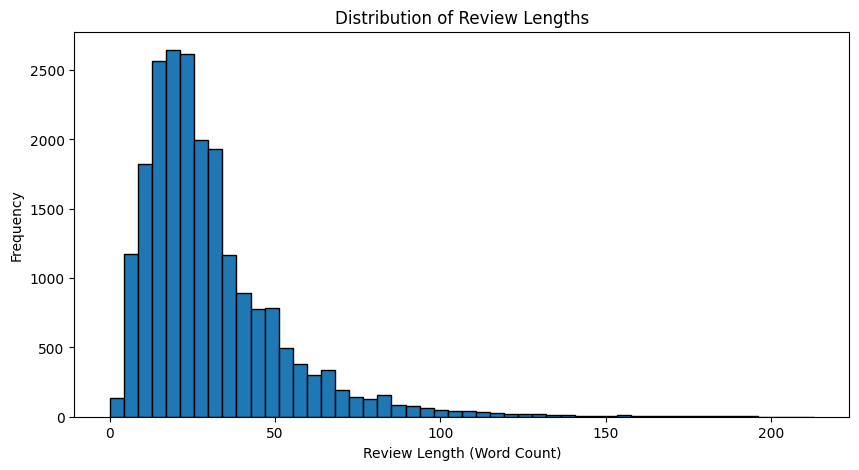

In [ ]:
import matplotlib.pyplot as plt
review_length_df=pd.DataFrame()
review_length_df['review_length'] = df_updated['review_text'].apply(lambda x: len(str(x).split()))

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(review_length_df['review_length'], bins=50, edgecolor='black')
plt.xlabel('Review Length (Word Count)')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-28-67f6a361b01c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')


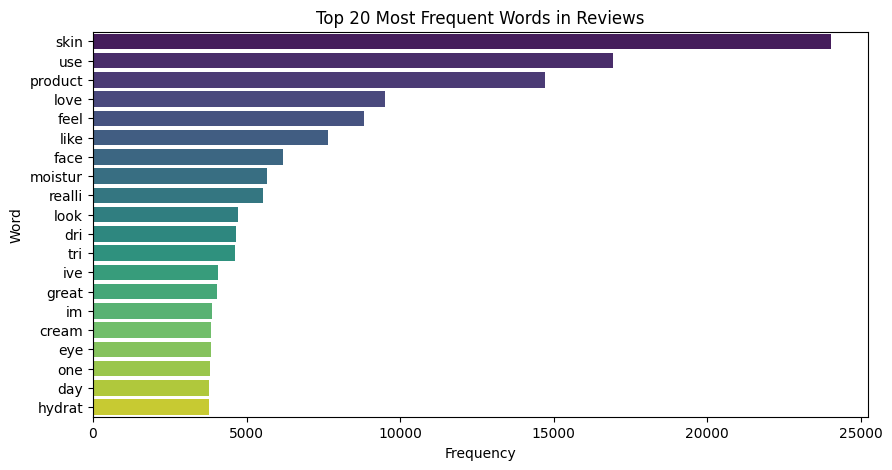

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_top_n_words(corpus, n=20):
    words = [word for text in corpus for word in text.split() if word.lower() not in stop_words]
    return Counter(words).most_common(n)

# Get top 20 words
top_words = get_top_n_words(df_updated['review_text'].dropna())

# Convert to DataFrame for display
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Display as table
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.show()

#4 Topic modeling

+ An unsupervised machine learning technique that discovers abstract "topics" within text collections.
  + Identifying patterns of word co-occurrence across documents
  + Grouping related terms into topics
  + Determining topic distributions within each document

+ Key concepts:
  + Documents contain multiple topics in different proportions
  + Topics are probability distributions over words

+ Common algorithms:
  + LDA: Probabilistic model of topic mixtures
  + NMF: Matrix factorization approach

+ Topic modeling helps automatically organize and summarize large text collections that would be impractical to analyze manually.

 + Applied three different topic modeling approaches:

  + Gensim LDA Model
    + Probabilistic topic model
    + Efficient for large datasets
    + Good for document-level analysis
   + Scikit-learn LDA Model
    + Similar to Gensim but with ML integration
    + Well-documented with consistent API
    + Good with medium datasets
   + NMF Model
     + Matrix factorization approach
     + Creates clearer topic separation
     + Better for short texts like reviews
     + Faster and more deterministic

In [ ]:
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

FINDING OPTIMAL NUMBER OF TOPICS

OPTIMAL NUMBER OF TOPICS: 8
Coherence score: 0.5270


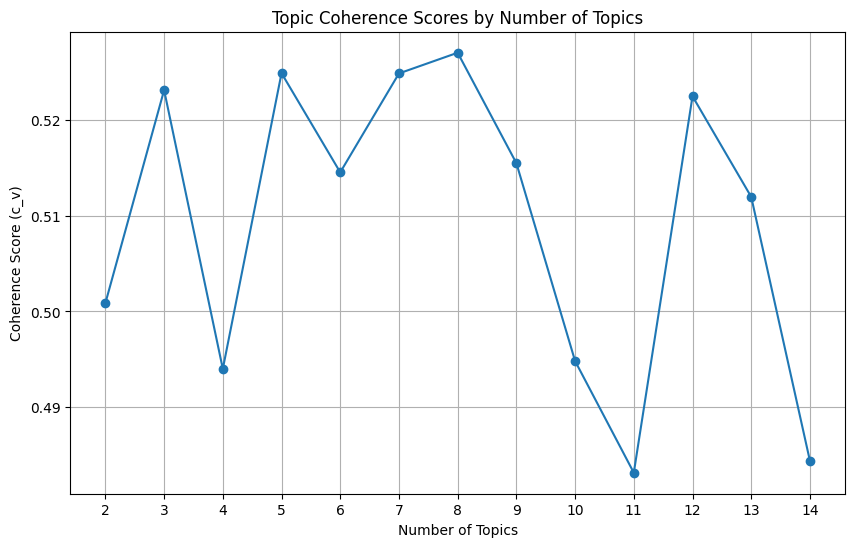


The optimal number of topics (8) has been determined and saved.
This number will remain consistent across runs due to fixed random states.
To use this number in other scripts, load it with: optimal_topics = np.load('optimal_topics.npy')


In [ ]:
warnings.filterwarnings('ignore')

# Set a fixed seed for all random operations to ensure reproducibility
np.random.seed(42)

# Function to preprocess text for gensim
def preprocess_for_gensim(texts):
    # Tokenize: Split the documents into words
    tokenized_docs = [doc.split() for doc in texts]

    # Create Dictionary
    dictionary = corpora.Dictionary(tokenized_docs)

    # Filter extremes (optional)
    dictionary.filter_extremes(no_below=5, no_above=0.5)

    # Convert to bag-of-words
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

    return dictionary, corpus, tokenized_docs


# Function to compute coherence values for different numbers of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics
    Returns:
    -------
    coherence_values : Coherence values for different numbers of topics
    """
    coherence_values = []
    for num_topics in range(start, limit, step):
        # Set random_state for reproducibility
        model = gensim.models.LdaModel(corpus=corpus,
                                      id2word=dictionary,
                                      num_topics=num_topics,
                                      random_state=42,  # Fixed random state
                                      passes=20,  # Increased passes for stability
                                      alpha='auto',
                                      iterations=100,  # Fixed number of iterations
                                      per_word_topics=True)

        coherencemodel = CoherenceModel(model=model,
                                       texts=texts,
                                       dictionary=dictionary,
                                       coherence='c_v')

        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values


# MAIN CODE - FINDING OPTIMAL NUMBER OF TOPICS
print("=" * 70)
print("FINDING OPTIMAL NUMBER OF TOPICS")
print("=" * 70)


# # Comment this out if your df_updated is already defined
# '''
# df_updated = pd.DataFrame({
#     'review_text': ["This product is amazing and works well",
#                    "Did not like the quality, poor construction",
#                    "Great price but shipping was slow",
#                    "Customer service was excellent when I had issues"],
#     'product_id': ['A123', 'B456', 'A123', 'C789'],
#     'rating': [5, 2, 4, 5]
# })
# '''


# Preprocess the review text
dictionary, corpus, tokenized_docs = preprocess_for_gensim(df_updated['review_text'])


# Set parameters for topic range
start_topics = 2
max_topics = 15
step_size = 1


# Compute coherence values
coherence_values = compute_coherence_values(dictionary=dictionary,
                                           corpus=corpus,
                                           texts=tokenized_docs,
                                           start=start_topics,
                                           limit=max_topics,
                                           step=step_size)


# Find the optimal number of topics (highest coherence score)
optimal_topics = coherence_values.index(max(coherence_values)) + start_topics
print(f"\nOPTIMAL NUMBER OF TOPICS: {optimal_topics}")
print(f"Coherence score: {max(coherence_values):.4f}")


# Save the optimal topic number for other scripts
np.save('optimal_topics.npy', optimal_topics)


# Visualize the coherence scores
plt.figure(figsize=(10, 6))
plt.plot(range(start_topics, max_topics), coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("Topic Coherence Scores by Number of Topics")
plt.xticks(range(start_topics, max_topics))
plt.grid(True)
plt.savefig('coherence_scores.png')
plt.show()


print(f"\nThe optimal number of topics ({optimal_topics}) has been determined and saved.")
print("This number will remain consistent across runs due to fixed random states.")
print("To use this number in other scripts, load it with: optimal_topics = np.load('optimal_topics.npy')")


In [ ]:
warnings.filterwarnings('ignore')


# Set seeds for reproducibility
np.random.seed(42)


# Load the optimal number of topics determined in the previous script
try:
    optimal_topics = np.load('optimal_topics.npy')
    # Convert numpy array to integer
    optimal_topics = int(optimal_topics)
    print(f"Loaded optimal number of topics: {optimal_topics}")
except:
    # If file not found, set a default
    optimal_topics = 5
    print(f"Optimal topics file not found. Using default: {optimal_topics}")


# Function to preprocess text for gensim
def preprocess_for_gensim(texts):
    # Tokenize: Split the documents into words
    tokenized_docs = [doc.split() for doc in texts]

    # Create Dictionary
    dictionary = corpora.Dictionary(tokenized_docs)

    # Filter extremes (optional)
    dictionary.filter_extremes(no_below=5, no_above=0.5)

    # Convert to bag-of-words
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

    return dictionary, corpus, tokenized_docs


# Function to print top words for each topic (for sklearn models)
def print_top_words(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[f"Topic {topic_idx}"] = ", ".join(top_words)
        print(f"Topic {topic_idx}: {' '.join(top_words)}")
    return topics


# MAIN CODE - TOPIC MODELING FOR ALL REVIEWS
print("=" * 70)
print("TOPIC MODELING FOR ALL REVIEWS")
print("=" * 70)

# GENSIM LDA MODEL
print("\n1. GENSIM LDA MODEL")
print("-" * 50)


# Preprocess the review text
dictionary, corpus, tokenized_docs = preprocess_for_gensim(df_updated['review_text'])


# Create and train the LDA model with optimal number of topics
lda_model = gensim.models.LdaModel(corpus=corpus,
                                 id2word=dictionary,
                                 num_topics=optimal_topics,
                                 random_state=42,  # Fixed random state
                                 passes=30,  # Increased passes for stability
                                 alpha='auto',
                                 iterations=100,  # Fixed iterations
                                 per_word_topics=True)


# Print the topics
print(f"\nTopics from LDA model with {optimal_topics} topics:")
for idx, topic in enumerate(lda_model.print_topics(num_words=10)):
    print(f"Topic #{idx}: {topic[1]}")


# Calculate coherence score of the final model
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"\nCoherence Score: {coherence_lda:.4f}")


# SKLEARN LDA MODEL
print("\n2. SKLEARN LDA MODEL")
print("-" * 50)


# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df_updated['review_text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()


# Run LDA with optimal number of topics
sklearn_lda = LatentDirichletAllocation(
    n_components=optimal_topics,
    random_state=42,  # Fixed random state
    learning_method='online',
    max_iter=100,  # Fixed iterations
    n_jobs=-1  # Use all processors
)
sklearn_lda.fit(tfidf)


# Print top words per topic
print(f"\nTopics from sklearn LDA model with {optimal_topics} topics:")
lda_topics = print_top_words(sklearn_lda, tfidf_feature_names, 10)


# NMF MODEL
print("\n3. NMF MODEL")
print("-" * 50)


# Run NMF with optimal number of topics
nmf_model = NMF(
    n_components=optimal_topics,
    random_state=42,  # Fixed random state
    max_iter=300  # Increased iterations for stability
)
nmf_model.fit(tfidf)


# Print top words per topic
print(f"\nTopics from NMF model with {optimal_topics} topics:")
nmf_topics = print_top_words(nmf_model, tfidf_feature_names, 10)


# Save the models for future use (optional)
# Uncomment these lines if you want to save the models
# lda_model.save('lda_model.model')
# import joblib
# joblib.dump(sklearn_lda, 'sklearn_lda_model.pkl')
# joblib.dump(nmf_model, 'nmf_model.pkl')


print("\nAll topic modeling approaches have been completed successfully.")
print("The results should be consistent across runs due to fixed random states.")


Loaded optimal number of topics: 8
TOPIC MODELING FOR ALL REVIEWS

1. GENSIM LDA MODEL
--------------------------------------------------

Topics from LDA model with 8 topics:
Topic #0: 0.035*"patch" + 0.027*"live" + 0.024*"barrier" + 0.021*"cold" + 0.020*"neck" + 0.019*"holi" + 0.018*"devic" + 0.016*"grail" + 0.015*"weather" + 0.014*"game"
Topic #1: 0.148*"cream" + 0.147*"eye" + 0.056*"line" + 0.036*"fine" + 0.033*"area" + 0.021*"wrinkl" + 0.020*"around" + 0.017*"circl" + 0.016*"dark" + 0.014*"age"
Topic #2: 0.132*"clean" + 0.108*"cleanser" + 0.052*"gentl" + 0.051*"makeup" + 0.048*"remov" + 0.046*"wash" + 0.043*"exfoli" + 0.030*"face" + 0.019*"job" + 0.014*"scrub"
Topic #3: 0.027*"ive" + 0.026*"help" + 0.025*"notic" + 0.024*"week" + 0.024*"serum" + 0.020*"see" + 0.019*"differ" + 0.018*"product" + 0.017*"acn" + 0.016*"day"
Topic #4: 0.190*"lip" + 0.066*"balm" + 0.040*"hyaluron" + 0.030*"roller" + 0.025*"hair" + 0.020*"acid" + 0.016*"laneig" + 0.012*"la" + 0.012*"de" + 0.011*"macren"
To

+ **Overall Patterns** <br>
Across all three models, we can identify consistent themes in the Sephora reviews:

    + **Eye products**: Addressing dark circles, puffiness, and fine lines
    + **Cleansers and makeup removers**: Gentle, effective cleansing products
    + **Moisturizers and hydrating products**: For various skin types
    + **Treatment products**: Serums, acids, and products for specific concerns like acne
    + **Lip products**: Balms and other lip care items
    + **Product efficacy and results**: Reviews discussing how products performed over time

+ We would choose **Scikit-learn LDA model** for the Sephora reviews analysis.
  + Here's why:
    + The topics appear more semantically coherent and clearly differentiated
    + The word groupings form more intuitive clusters related to specific product categories and concerns
    + The keywords in each topic are more complete words rather than word fragments, making interpretation more straightforward
    + The topic distribution shows a clearer separation between product types, concerns, and sentiment

In [ ]:
# Set seeds for reproducibility
np.random.seed(42)

# Function to preprocess text for gensim
def preprocess_for_gensim(texts):
    # Tokenize: Split the documents into words
    tokenized_docs = [doc.split() for doc in texts]

    # Create Dictionary
    dictionary = corpora.Dictionary(tokenized_docs)

    # Filter extremes (optional - adjust based on corpus size)
    min_docs = max(2, len(texts) // 20)  # Adaptive filtering based on corpus size
    dictionary.filter_extremes(no_below=min_docs, no_above=0.7)

    # Convert to bag-of-words
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

    return dictionary, corpus, tokenized_docs

# Function to compute coherence values for different numbers of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics
    Returns:
    -------
    coherence_values : Coherence values for different numbers of topics
    """
    coherence_values = []
    for num_topics in range(start, limit, step):
        # Set random_state for reproducibility
        model = gensim.models.LdaModel(corpus=corpus,
                                      id2word=dictionary,
                                      num_topics=num_topics,
                                      random_state=42,  # Fixed random state
                                      passes=20,  # Increased passes for stability
                                      iterations=100,  # Fixed iterations
                                      alpha='auto',
                                      per_word_topics=True)

        coherencemodel = CoherenceModel(model=model,
                                       texts=texts,
                                       dictionary=dictionary,
                                       coherence='c_v')

        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values


# Function to find optimal number of topics with stabilization
def find_optimal_topics(corpus, dictionary, texts, max_topics=15):
    # If we have very few documents, limit the number of topics
    if len(texts) < 20:
        return 2  # Return a minimum of 2 topics for very small datasets

    # Set a reasonable maximum number of topics based on corpus size
    max_topics = min(max_topics, len(texts) // 5, 15)

    # Ensure we have at least 3 potential topics
    if max_topics < 4:
        max_topics = 4

    # Compute coherence scores
    coherence_values = compute_coherence_values(
        dictionary=dictionary,
        corpus=corpus,
        texts=texts,
        start=2,
        limit=max_topics,
        step=1
    )

    # Find the topic number with highest coherence score
    optimal_num = coherence_values.index(max(coherence_values)) + 2

    return optimal_num


# MAIN CODE - PRODUCT-SPECIFIC TOPIC MODELING
print("=" * 70)
print("PRODUCT-SPECIFIC TOPIC MODELING")
print("=" * 70)

# Get all unique product IDs
unique_products = df_updated['product_id'].unique()
print(f"Total number of unique products: {len(unique_products)}")

# Create a dictionary to store results
product_topics = {}

# Loop through each product
for product_id in unique_products:
    print("\n" + "=" * 50)
    print(f"ANALYZING PRODUCT: {product_id}")
    print("=" * 50)

    # Get reviews for this product
    product_reviews = df_updated[df_updated['product_id'] == product_id]['review_text']
    num_reviews = len(product_reviews)

    print(f"Number of reviews: {num_reviews}")

    # Skip products with too few reviews
    if num_reviews < 10:
        print(f"Not enough reviews for reliable topic modeling (minimum 10 required).")
        print(f"Setting default of 2 topics for product {product_id}")
        product_topics[product_id] = {
            'num_topics': 2,
            'num_reviews': num_reviews,
            'topics': ["Insufficient data for detailed topics"]
        }
        continue

    # Preprocess the review text
    dictionary, corpus, tokenized_docs = preprocess_for_gensim(product_reviews)

    # Find optimal number of topics for this product
    optimal_num_topics = find_optimal_topics(
        corpus=corpus,
        dictionary=dictionary,
        texts=tokenized_docs,
        max_topics=min(15, num_reviews // 5)  # Limit max topics based on review count
    )

    print(f"Optimal number of topics for product {product_id}: {optimal_num_topics}")

    # Create and train the LDA model with optimal number of topics
    lda_model = gensim.models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=optimal_num_topics,
        random_state=42,  # Fixed random state
        passes=30,  # Increased passes for stability
        iterations=100,  # Fixed iterations
        alpha='auto',
        per_word_topics=True
    )

    # Print the topics
    print(f"\nTopics for product {product_id}:")
    topics_list = []
    for idx, topic in enumerate(lda_model.print_topics(num_words=8)):
        topic_str = topic[1]
        topics_list.append(topic_str)
        print(f"Topic #{idx}: {topic_str}")

    # Calculate coherence score
    coherence_model_lda = CoherenceModel(
        model=lda_model,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_lda = coherence_model_lda.get_coherence()
    print(f"Coherence Score: {coherence_lda:.4f}")

    # Store results
    product_topics[product_id] = {
        'num_topics': optimal_num_topics,
        'num_reviews': num_reviews,
        'coherence': coherence_lda,
        'topics': topics_list
    }


# Print summary of all products
print("\n" + "=" * 70)
print("PRODUCT TOPIC MODELING SUMMARY")
print("=" * 70)

for product_id, info in product_topics.items():
    print(f"\nProduct: {product_id}")
    print(f"Number of reviews: {info['num_reviews']}")
    print(f"Optimal number of topics: {info['num_topics']}")
    if 'coherence' in info:
        print(f"Coherence score: {info['coherence']:.4f}")
    print("Topics:")
    for i, topic in enumerate(info['topics']):
        if len(topic) > 100:
            topic = topic[:100] + "..."  # Truncate long topics for display
        print(f"  Topic #{i}: {topic}")

# Save results to files (optional)
# Uncomment if you want to save the results
# import json
# with open('product_topics.json', 'w') as f:
#     json.dump(product_topics, f)

print("\nProduct-specific topic modeling completed successfully.")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Number of reviews: 10
Optimal number of topics: 2
Coherence score: 0.3270
Topics:
  Topic #0: 0.106*"like" + 0.069*"travel" + 0.069*"great" + 0.063*"clean" + 0.062*"feel" + 0.050*"easi" + 0.050*...
  Topic #1: 0.101*"skin" + 0.069*"use" + 0.069*"realli" + 0.067*"im" + 0.058*"batteri" + 0.046*"get" + 0.038*"on...

Product: P474832
Number of reviews: 10
Optimal number of topics: 2
Coherence score: 0.2523
Topics:
  Topic #0: 0.087*"mask" + 0.067*"love" + 0.048*"scent" + 0.048*"last" + 0.048*"dont" + 0.048*"use" + 0.048*"per...
  Topic #1: 0.086*"feel" + 0.076*"love" + 0.056*"hydrat" + 0.056*"super" + 0.045*"mask" + 0.035*"product" + 0.03...

Product: P474838
Number of reviews: 10
Optimal number of topics: 2
Coherence score: 0.2486
Topics:
  Topic #0: 0.048*"love" + 0.043*"immun" + 0.039*"ive" + 0.037*"tast" + 0.031*"alway" + 0.031*"easi" + 0.030*"sy...
  Topic #1: 0.069*"gummi" + 0.044*"like" + 0.043*"feel" + 0.041*"supplement" + 0.041*"take" + 0.034*"d

+ it shows topics by each product

# 5 Sentiment Analysis

## 5.1 VADER Sentiment Analysis
- Used VADER (Valence Aware Dictionary and sEntiment Reasoner) to classify sentiment.
- Defined a function to compute sentiment based on compound score:

In [ ]:
# Importing VADER sentiment analyzer from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Downloading the VADER lexicon (necessary for sentiment analysis)
nltk.download("vader_lexicon")

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment_vader(text):
    """
    Assigns a sentiment category (Positive, Negative, or Neutral) based on the compound score from VADER.
    """
    if isinstance(text, str):  # Ensure it's a valid string
        score = sia.polarity_scores(text)["compound"]  # Compound score

        # Classify sentiment based on the compound score
        if score >= 0.05:
            return "positive"
        elif score <= -0.05:
            return "negative"
        else:
            return "neutral"

    return "neutral"

# Apply to reviews
df_updated["sentiment_vader"] = df_updated["review_text"].apply(get_sentiment_vader)

# Display results
df_updated[["review_text", "sentiment_vader"]].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


review_text sentiment_vader
0  cant believ seen result less week circl eye se...        negative
1  cute packag im realli impress result im see ac...        positive
2  never seen posit result short length time gene...        negative
3  ive use murad essentialc eye cream spf time im...        positive
4  dont think ive notic differ dark circl visibl ...        negative

In [ ]:
# Display the 'df_updated' DataFrame
df_updated

rating                                        review_text product_id  \
0           5  cant believ seen result less week circl eye se...    P107306   
1           5  cute packag im realli impress result im see ac...    P107306   
2           5  never seen posit result short length time gene...    P107306   
3           4  ive use murad essentialc eye cream spf time im...    P107306   
4           4  dont think ive notic differ dark circl visibl ...    P107306   
...       ...                                                ...        ...   
22262       5  use product sever year would recomend familey ...      P9941   
22263       1  accident bought product quickli return soon ca...      P9941   
22264       4  ive use murad essenti c line contain vitamin c...      P9941   
22265       5  feel like skin glow brighter week use harsh dr...      P9941   
22266       5  gentl cleanser smell great leav skin fresh cle...      P9941   

      sentiment_vader  
0            negative  
1            positive  
2            negative  
3            positive  
4            negative  
...               ...  
22262        positive  
22263        negative  
22264        positive  
22265        positive  
22266        positive  

[21220 rows x 4 columns]

In [ ]:
# Compute sentiment distribution for VADER (absolute count)
vader_distribution = df_updated["sentiment_vader"].value_counts()

# Display the distribution
print("Sentiment Distribution (VADER) - Count:\n", vader_distribution)


Sentiment Distribution (VADER) - Count:
 sentiment_vader
positive    18488
negative     1530
neutral      1202
Name: count, dtype: int64


### 5.1.1 Sentiment Score Calculation (VADER)
- Counted the number of Positive, Neutral, Negative reviews per product.
- Computed Sentiment Score:

In [ ]:
# Grouping data by 'product_id' and 'sentiment_vader', then counting occurrences
sentiment_counts = (
    df_updated
    .groupby(['product_id', 'sentiment_vader']) # Group by product and sentiment category
    .size() # Count the occurrences in each group
    .unstack(fill_value=0) ) # Convert to a pivot-table format, filling missing values with 0

# Display the resulting DataFrame
sentiment_counts

sentiment_vader  negative  neutral  positive
product_id                                  
P107306                 4        1         5
P114902                 1        0         9
P12045                  1        2         7
P122651                 3        1         6
P122661                 1        0         9
...                   ...      ...       ...
P94421                  1        2         7
P94812                  0        0        10
P9939                   1        0         9
P9940                   0        1         9
P9941                   1        2         7

[2122 rows x 3 columns]

- Sorted products based on sentiment score:

In [ ]:
# Calculating sentiment score (Positive count - Negative count)
sentiment_counts['sentiment_score'] = sentiment_counts.get('positive', 0) - sentiment_counts.get('negative', 0)

# Sorting products by sentiment score in descending order (most positive first)
sorted_sentiment = sentiment_counts.sort_values(by='sentiment_score', ascending=False)

# Display the sorted sentiment scores
sorted_sentiment

sentiment_vader  negative  neutral  positive  sentiment_score
product_id                                                   
P457011                 0        0        10               10
P503197                 0        0        10               10
P482755                 0        0        10               10
P503123                 0        0        10               10
P463144                 0        0        10               10
...                   ...      ...       ...              ...
P440302                 5        1         4               -1
P460010                 5        1         4               -1
P419466                 5        1         4               -1
P483057                 6        1         3               -3
P448563                 5        3         2               -3

[2122 rows x 4 columns]

In [ ]:
# Merge sorted sentiment scores back with df_updated to include reviews
df_with_sentiments = df_updated.merge(sorted_sentiment, on="product_id", how="left")




In [ ]:
print(df_with_sentiments.columns)


Index(['rating', 'review_text', 'product_id', 'sentiment_vader', 'negative',
       'neutral', 'positive', 'sentiment_score'],
      dtype='object')


In [ ]:
df_final = df_with_sentiments[["rating", "review_text", "product_id", "sentiment_vader", "sentiment_score"]]
df_top_10 = df_final.sort_values(by="sentiment_score", ascending=False).head(10)
print(df_top_10)


       rating                                        review_text product_id  \
10610       5  mask super great left skin hydrat use rubber m...    P457011   
11688       2  product made face extrem oili combin skin hope...    P462748   
19600       5  love love love facial roller feel amaz skin se...    P502986   
19601       5  gift sephora jade facial roller high qualiti b...    P502986   
19602       5  gift sephora collect jade roller cool put beau...    P502986   
19603       5  sephora collect realli slept nice face roller ...    P502986   
19604       5  beauti jade roller steal ive want one help lym...    P502986   
19605       5  love incred facial roller chill fridg use appl...    P502986   
19606       5  omg love color also love dual end facial rolle...    P502986   
19607       5  super nice qualiti facial roller dont anyth ba...    P502986   

      sentiment_vader  sentiment_score  
10610        positive               10  
11688        positive               10  
19600  

## 5.2 TextBlob Sentiment Analysis
- Used TextBlob to compute polarity scores:

In [ ]:
from textblob import TextBlob

# Function to determine sentiment using TextBlob
def get_sentiment_textblob(text):
    """
    Classifies sentiment based on TextBlob's polarity score.
    - Positive if polarity >= 0.05
    - Negative if polarity <= -0.05
    - Neutral if polarity = 0
    """
    if isinstance(text, str):  # Ensure it's a valid string
        score = TextBlob(text).sentiment.polarity  # Polarity score

        # Classifying sentiment based on polarity score
        if score >= 0.05:
            return "positive"
        elif score <= -0.05 :
            return "negative"
        else:
            return "neutral"

    return "neutral" # Default to Neutral for non-string inputs

# Apply to reviews
df_updated["sentiment_textblob"] = df_updated["review_text"].apply(get_sentiment_textblob)

# Display results
df_updated[["review_text", "sentiment_textblob"]].head()


review_text sentiment_textblob
0  cant believ seen result less week circl eye se...            neutral
1  cute packag im realli impress result im see ac...           positive
2  never seen posit result short length time gene...            neutral
3  ive use murad essentialc eye cream spf time im...           positive
4  dont think ive notic differ dark circl visibl ...           negative

### 5.2.1 Sentiment Score Calculation(TextBlob)
- Counted the number of Positive, Neutral, Negative reviews per product.
- Computed Sentiment Score:

In [ ]:
# Grouping data by 'product_id' and 'sentiment_textblob', then counting occurrences
sentiment_textblob_counts = (
    df_updated
    .groupby(['product_id', 'sentiment_textblob']) # Group by product and sentiment category
    .size() # Count the occurrences in each group
    .unstack(fill_value=0) ) # Convert to a pivot-table format, filling missing values with 0

# Display the resulting DataFrame
sentiment_textblob_counts

sentiment_textblob  negative  neutral  positive
product_id                                     
P107306                    3        3         4
P114902                    2        2         6
P12045                     2        1         7
P122651                    2        1         7
P122661                    1        1         8
...                      ...      ...       ...
P94421                     0        2         8
P94812                     0        1         9
P9939                      1        1         8
P9940                      0        0        10
P9941                      0        2         8

[2122 rows x 3 columns]

In [ ]:
# # Calculating sentiment score using TextBlob (Positive count - Negative count)
# sentiment_textblob_counts['sentiment_score'] = sentiment_textblob_counts.get('Positive', 0) - sentiment_textblob_counts.get('Negative', 0)

# # Sorting products by sentiment score in descending order (most positive first)
# sorted_sentiments_textblob = sentiment_textblob_counts.sort_values(by='sentiment_score', ascending=False)

# # Display the sorted sentiment scores
# sorted_sentiments_textblob

In [ ]:
# Calculating sentiment score using TextBlob (Positive count - Negative count)
sentiment_textblob_counts['sentiment_score'] = sentiment_textblob_counts['positive'] - sentiment_textblob_counts['negative']

# Sorting products by sentiment score in descending order (most positive first)
sorted_sentiments_textblob = sentiment_textblob_counts.sort_values(by='sentiment_score', ascending=False)

# Display the sorted sentiment scores
sorted_sentiments_textblob

sentiment_textblob  negative  neutral  positive  sentiment_score
product_id                                                      
P457011                    0        0        10               10
P475185                    0        0        10               10
P475921                    0        0        10               10
P430813                    0        0        10               10
P475203                    0        0        10               10
...                      ...      ...       ...              ...
P392249                    4        2         4                0
P386762                    3        4         3                0
P422000                    5        1         4               -1
P421432                    4        3         3               -1
P433456                    5        1         4               -1

[2122 rows x 4 columns]

In [ ]:
# double-checking whether sentiment_score is calulated correctly
p107306_info = sentiment_textblob_counts.loc['P107306']
p107306_info

sentiment_textblob
negative           3
neutral            3
positive           4
sentiment_score    1
Name: P107306, dtype: int64

In [ ]:
# Display the 'df_updated' DataFrame
df_updated

rating                                        review_text product_id  \
0           5  cant believ seen result less week circl eye se...    P107306   
1           5  cute packag im realli impress result im see ac...    P107306   
2           5  never seen posit result short length time gene...    P107306   
3           4  ive use murad essentialc eye cream spf time im...    P107306   
4           4  dont think ive notic differ dark circl visibl ...    P107306   
...       ...                                                ...        ...   
22262       5  use product sever year would recomend familey ...      P9941   
22263       1  accident bought product quickli return soon ca...      P9941   
22264       4  ive use murad essenti c line contain vitamin c...      P9941   
22265       5  feel like skin glow brighter week use harsh dr...      P9941   
22266       5  gentl cleanser smell great leav skin fresh cle...      P9941   

      sentiment_vader sentiment_textblob  
0            negative            neutral  
1            positive           positive  
2            negative            neutral  
3            positive           positive  
4            negative           negative  
...               ...                ...  
22262        positive            neutral  
22263        negative           positive  
22264        positive           positive  
22265        positive           positive  
22266        positive           positive  

[21220 rows x 5 columns]

### 5.2.2 Top 10 Best Products TextBlob
- Selected top 10 products with the highest sentiment score:

In [ ]:
# Selecting the top 10 products with the highest sentiment scores (TextBlob analysis)
top_10_textblob = sorted_sentiments_textblob.nlargest(10, 'sentiment_score')

# Merging product details from data_product_info to enrich the top 10 dataset
top_10_textblob = top_10_textblob.merge(data_product_info[['product_id', 'product_name', 'brand_name', 'rating',
                                         'price_usd', 'highlights',  'primary_category',
                                         'secondary_category', 'tertiary_category']],
                                        on='product_id', how='left') # Left join to keep only matching product IDs

# Display the final dataset with top 10 positive sentiment products
top_10_textblob

product_id  negative  neutral  positive  sentiment_score  \
0    P457011         0        0        10               10   
1    P475185         0        0        10               10   
2    P475921         0        0        10               10   
3    P430813         0        0        10               10   
4    P475203         0        0        10               10   
5    P431848         0        0        10               10   
6    P432048         0        0        10               10   
7    P475190         0        0        10               10   
8    P432421         0        0        10               10   
9    P474967         0        0        10               10   

                                        product_name          brand_name  \
0             Cryo Rubber Mask with Firming Collagen           Dr. Jart+   
1          24-7 Moisture Hydrating Day & Night Cream       TULA Skincare   
2  Double Serum Eye Firming & Hydrating Anti-Agin...             Clarins   
3           Advanced Génifique Hydrogel Melting Mask             Lancôme   
4     Mini 24-7 Moisture Hydrating Day & Night Cream       TULA Skincare   
5                              Cold Plunge Pore Mask        OLEHENRIKSEN   
6                        Resurfacing AHA + BHA Serum         Tata Harper   
7  Rose Glow + Get It Cooling & Brightening Eye Balm       TULA Skincare   
8                      SUPERMASK - The Charcoal Mask  SEPHORA COLLECTION   
9          NuFACE Firming and Brightening Silk Crème              NuFACE   

   rating  price_usd                                         highlights  \
0  4.8462       15.0  ['Collagen', 'Hyaluronic Acid', 'Vitamin C', '...   
1  4.1884       54.0  ['Good for: Dullness/Uneven Texture', 'Good fo...   
2  4.2278       82.0  ['Good for: Loss of firmness', 'Hydrating', 'G...   
3  4.0833       15.0                                                NaN   
4  4.1884       26.0  ['Good for: Dullness/Uneven Texture', 'Good fo...   
5  4.5335       41.0  ['Salicylic Acid', 'Lactic Acid', 'Good for: P...   
6  4.2562       92.0  ['Vegan', 'Good for: Dullness/Uneven Texture',...   
7  4.0732       32.0  ['Hyaluronic Acid', 'Good for: Loss of firmnes...   
8  3.7614        5.5                                                NaN   
9  4.5625       69.0  ['Hyaluronic Acid', 'Good for: Loss of firmnes...   

  primary_category secondary_category        tertiary_category  
0         Skincare              Masks               Face Masks  
1         Skincare       Moisturizers             Moisturizers  
2         Skincare           Eye Care  Eye Creams & Treatments  
3         Skincare              Masks              Sheet Masks  
4         Skincare       Moisturizers             Moisturizers  
5         Skincare              Masks               Face Masks  
6         Skincare         Treatments              Face Serums  
7         Skincare           Eye Care  Eye Creams & Treatments  
8         Skincare              Masks               Face Masks  
9         Skincare       Moisturizers             Moisturizers

##5.3 Sentence Transformer Sentiment Analysis

*   List item
*   List item



In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming df_updated is already loaded with columns 'review_text', 'product_id', 'rating'

def perform_sentiment_analysis(df):
    # Load pre-trained sentence transformer model
    model = SentenceTransformer('all-MiniLM-L6-v2')

    # Define sentiment anchor texts
    sentiment_anchors = {
        'positive': 'This product is excellent, amazing, and wonderful.',
        'neutral': 'This product is okay, average, and acceptable.',
        'negative': 'This product is terrible, horrible, and disappointing.'
    }

    # Encode anchor texts
    anchor_embeddings = model.encode(list(sentiment_anchors.values()))

    # Encode all review texts (this can take time for large datasets)
    print("Encoding reviews... (this may take some time)")
    review_embeddings = model.encode(df_updated['review_text'].tolist())

    # Calculate cosine similarity between reviews and anchors
    similarities = cosine_similarity(review_embeddings, anchor_embeddings)

    # Add sentiment scores to dataframe
    df['sentiment_positive'] = similarities[:, 0]
    df['sentiment_neutral'] = similarities[:, 1]
    df['sentiment_negative'] = similarities[:, 2]

    # Determine the dominant sentiment
    sentiment_cols = ['sentiment_positive', 'sentiment_neutral', 'sentiment_negative']
    df_updated_transformer['sentiment_transformer'] = df_updated_transformer[sentiment_cols].idxmax(axis=1).apply(lambda x: x.split('_')[1])

    # Calculate a single sentiment score (from -1 to 1)
    df_updated_transformer['sentiment_score'] = df_updated_transformer['sentiment_positive'] - df_updated_transformer['sentiment_negative']

    return df

# Perform sentiment analysis
df_with_sentiment = perform_sentiment_analysis(df_updated_transformer)

# Display summary
print("\nSentiment Distribution:")
print(df_with_sentiment['sentiment_transformer'].value_counts())

# Optional: Analyze sentiment scores by rating
print("\nAverage Sentiment Score by Rating:")
print(df_with_sentiment.groupby('rating')['sentiment_score'].mean())

# Optional: See top positive and negative reviews
print("\nTop 5 Most Positive Reviews:")
print(df_with_sentiment.nlargest(5, 'sentiment_score')[['review_text', 'sentiment_score', 'rating']])

print("\nTop 5 Most Negative Reviews:")
print(df_with_sentiment.nsmallest(5, 'sentiment_score')[['review_text', 'sentiment_score', 'rating']])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Encoding reviews... (this may take some time)

Sentiment Distribution:
sentiment_transformer
positive    10030
negative     6451
neutral      4739
Name: count, dtype: int64

Average Sentiment Score by Rating:
rating
1   -0.028222
2   -0.014589
3   -0.000753
4    0.012105
5    0.015596
Name: sentiment_score, dtype: float32

Top 5 Most Positive Reviews:
                                             review_text  sentiment_score  \
1755   Again a huge thanks to both Stephanie Nicole a...         0.173337   
12603  Love the product so much .Light , creamy and S...         0.172650   
20336  Love this moisturizer, it felt great on my ski...         0.169187   
20557  Alpyn beauty set!  Yes please. This brand is m...         0.164521   
18241  SILKY and MOUSSEY + sun protection. Love it. P...         0.164197   

       rating  
1755        5  
12603       5  
20336       5  
20557       5  
18241       5  

Top 5 Most Negative Reviews:
                                             review_text 

In [ ]:
#df_updated_transformer = df_updated_transformer.drop(columns=['sentiment_positive', 'sentiment_neutral', 'sentiment_negative'])

In [ ]:
df_updated_transformer

rating                                        review_text product_id  \
0           5  I can’t believe that I have seen results in le...    P107306   
1           5  Cute packaging I’m really impressed with the r...    P107306   
2           5  Never before have I seen such positive results...    P107306   
3           4  I’ve been using Murad’s “Essential-C Eye Cream...    P107306   
4           4  I don’t think I’ve noticed a difference in my ...    P107306   
...       ...                                                ...        ...   
22262       5  I used this product for several years. I would...      P9941   
22263       1  I accidentally bought this product and I quick...      P9941   
22264       4  I’ve been using all of murad’s essential C lin...      P9941   
22265       5  I feel like my skin is glowing and brighter af...      P9941   
22266       5  Very gentle cleanser. Smells great and leaves ...      P9941   

       sentiment_positive  sentiment_neutral  sentiment_negative  \
0                0.150141           0.183888            0.193892   
1                0.167477           0.197306            0.144199   
2                0.232043           0.223802            0.309903   
3                0.202909           0.207687            0.177616   
4                0.321368           0.246667            0.247783   
...                   ...                ...                 ...   
22262            0.204970           0.227255            0.202809   
22263            0.209172           0.303703            0.252993   
22264            0.234754           0.220551            0.256482   
22265            0.252433           0.201313            0.263777   
22266            0.241590           0.263173            0.264206   

      sentiment_transformer  sentiment_score  
0                  negative        -0.043751  
1                   neutral         0.023278  
2                  negative        -0.077859  
3                   neutral         0.025294  
4                  positive         0.073585  
...                     ...              ...  
22262               neutral         0.002161  
22263               neutral        -0.043821  
22264              negative        -0.021729  
22265              negative        -0.011345  
22266              negative        -0.022616  

[21220 rows x 8 columns]

In [ ]:
# Compute sentiment distribution for Sentence Transformer (absolute count)
transformer_distribution = df_updated_transformer["sentiment_transformer"].value_counts()

# Display the distribution
print("Sentiment Distribution (Sentence Transformer) - Count:\n", transformer_distribution)


Sentiment Distribution (Sentence Transformer) - Count:
 sentiment_transformer
positive    10030
negative     6451
neutral      4739
Name: count, dtype: int64


In [ ]:
# Count how many sentiment classifications are the same
same_sentiments = (df_updated["sentiment_vader"] == df_updated_transformer["sentiment_transformer"]).sum()
different_sentiments = (df_updated["sentiment_vader"] != df_updated_transformer["sentiment_transformer"]).sum()

# Display results
print(f"Number of matching sentiment classifications: {same_sentiments}")
print(f"Number of differing sentiment classifications: {different_sentiments}")

Number of matching sentiment classifications: 10472
Number of differing sentiment classifications: 10748


In [ ]:
print(df_updated_transformer[['review_text', 'sentiment_transformer']].head(10))


                                         review_text sentiment_transformer
0  I can’t believe that I have seen results in le...              negative
1  Cute packaging I’m really impressed with the r...               neutral
2  Never before have I seen such positive results...              negative
3  I’ve been using Murad’s “Essential-C Eye Cream...               neutral
4  I don’t think I’ve noticed a difference in my ...              positive
5  This is THE product for women over 50 and have...              negative
6  this eye cream actually made my eyes MORE puff...              negative
7  Great texture, easy to dispense, and perfect u...              positive
8  When applying onto under eyes make sure to not...              positive
9  Hydrating, have not experienced dark circles u...              positive


- Sorted products based on sentiment score:

##5.4 Comparison
Here we are comparing the 3 methods. We also checked the correlation with ratings.

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

In [ ]:
# Ensure df_comparison contains all three models' sentiment results
df_comparison = df_updated.copy()

In [ ]:
df_comparison

rating                                        review_text product_id  \
0           5  cant believ seen result less week circl eye se...    P107306   
1           5  cute packag im realli impress result im see ac...    P107306   
2           5  never seen posit result short length time gene...    P107306   
3           4  ive use murad essentialc eye cream spf time im...    P107306   
4           4  dont think ive notic differ dark circl visibl ...    P107306   
...       ...                                                ...        ...   
22262       5  use product sever year would recomend familey ...      P9941   
22263       1  accident bought product quickli return soon ca...      P9941   
22264       4  ive use murad essenti c line contain vitamin c...      P9941   
22265       5  feel like skin glow brighter week use harsh dr...      P9941   
22266       5  gentl cleanser smell great leav skin fresh cle...      P9941   

      sentiment_vader sentiment_textblob  
0            negative            neutral  
1            positive           positive  
2            negative            neutral  
3            positive           positive  
4            negative           negative  
...               ...                ...  
22262        positive            neutral  
22263        negative           positive  
22264        positive           positive  
22265        positive           positive  
22266        positive           positive  

[21220 rows x 5 columns]

In [ ]:
df_comparison.columns

Index(['rating', 'review_text', 'product_id', 'sentiment_vader',
       'sentiment_textblob'],
      dtype='object')

In [ ]:
# Adding sentiment results from all three models
df_comparison["sentiment_vader"] = df_updated["sentiment_vader"]
df_comparison["sentiment_transformer"] = df_updated_transformer["sentiment_transformer"]
df_comparison["sentiment_textblob"] = df_updated["sentiment_textblob"]

# Map sentiment labels to numerical values
sentiment_mapping = {"positive": 1, "neutral": 0, "negative": -1}
df_comparison["sentiment_vader_mapped"] = df_comparison["sentiment_vader"].map(sentiment_mapping)
df_comparison["sentiment_transformer_mapped"] = df_comparison["sentiment_transformer"].map(sentiment_mapping)
df_comparison["sentiment_textblob_mapped"] = df_comparison["sentiment_textblob"].map(sentiment_mapping)

# 1. Compute agreement percentage among all three models
agreement_all = (
    (df_comparison["sentiment_vader"] == df_comparison["sentiment_transformer"]) &
    (df_comparison["sentiment_vader"] == df_comparison["sentiment_textblob"])
).sum()
agreement_percentage_all = (agreement_all / len(df_comparison)) * 100

# 2. Compute pairwise agreement percentages
agreement_vt = (df_comparison["sentiment_vader"] == df_comparison["sentiment_transformer"]).mean() * 100
agreement_vb = (df_comparison["sentiment_vader"] == df_comparison["sentiment_textblob"]).mean() * 100
agreement_tb = (df_comparison["sentiment_transformer"] == df_comparison["sentiment_textblob"]).mean() * 100

# 3. Compute sentiment distribution for each model
vader_distribution = df_comparison["sentiment_vader_mapped"].value_counts()
transformer_distribution = df_comparison["sentiment_transformer_mapped"].value_counts()
textblob_distribution = df_comparison["sentiment_textblob_mapped"].value_counts()

# 4. Compute correlation with product ratings
vader_correlation = df_comparison["sentiment_vader_mapped"].corr(df_comparison["rating"])
transformer_correlation = df_comparison["sentiment_transformer_mapped"].corr(df_comparison["rating"])
textblob_correlation = df_comparison["sentiment_textblob_mapped"].corr(df_comparison["rating"])

# 5. Generate classification reports (if ground truth labels exist)
if "true_sentiment" in df_comparison.columns:
    true_labels = df_comparison["true_sentiment"].map(sentiment_mapping)
    vader_report = classification_report(true_labels, df_comparison["sentiment_vader_mapped"])
    transformer_report = classification_report(true_labels, df_comparison["sentiment_transformer_mapped"])
    textblob_report = classification_report(true_labels, df_comparison["sentiment_textblob_mapped"])

    print("VADER Classification Report:\n", vader_report)
    print("Transformer Classification Report:\n", transformer_report)
    print("TextBlob Classification Report:\n", textblob_report)

# Prepare results dataframe
comparison_results = pd.DataFrame({
    "Metric": [
        "Agreement (All 3 Models)",
        "Agreement (VADER vs Transformer)",
        "Agreement (VADER vs TextBlob)",
        "Agreement (Transformer vs TextBlob)",
        "Correlation with Rating (VADER)",
        "Correlation with Rating (Transformer)",
        "Correlation with Rating (TextBlob)"
    ],
    "Value": [
        agreement_percentage_all,
        agreement_vt,
        agreement_vb,
        agreement_tb,
        vader_correlation,
        transformer_correlation,
        textblob_correlation
    ]
})

# Display results
print(comparison_results)


                                  Metric      Value
0               Agreement (All 3 Models)  42.370405
1       Agreement (VADER vs Transformer)  49.349670
2          Agreement (VADER vs TextBlob)  81.998115
3    Agreement (Transformer vs TextBlob)  47.657870
4        Correlation with Rating (VADER)   0.281260
5  Correlation with Rating (Transformer)   0.222182
6     Correlation with Rating (TextBlob)   0.246217


In [ ]:
# Compute sentiment distribution for each model as percentages
vader_distribution = df_comparison["sentiment_vader_mapped"].value_counts(normalize=True).rename("VADER Percentage") * 100
transformer_distribution = df_comparison["sentiment_transformer_mapped"].value_counts(normalize=True).rename("Transformer Percentage") * 100
textblob_distribution = df_comparison["sentiment_textblob_mapped"].value_counts(normalize=True).rename("TextBlob Percentage") * 100

# Combine all distributions into a single DataFrame
distribution_comparison_percent = pd.concat([vader_distribution, transformer_distribution, textblob_distribution], axis=1).fillna(0)

# Rename index for clarity
distribution_comparison_percent.index = distribution_comparison_percent.index.map({1: "Positive", 0: "Neutral", -1: "Negative"})

# Display the results
print("Sentiment Distribution Comparison Across Models (Percentage):")
print(distribution_comparison_percent)


Sentiment Distribution Comparison Across Models (Percentage):
          VADER Percentage  Transformer Percentage  TextBlob Percentage
Positive         87.125353               47.266730            81.644675
Negative          7.210179               30.400566             6.559849
Neutral           5.664467               22.332705            11.795476


As shown above the disteribution of the sentence transformer is more realistic and the correlation with ratings are higher, so we will rank our products based on the second method.

In [ ]:
# Optional: See top positive and negative reviews
Top_10_products= df_updated_transformer.nlargest(10, 'sentiment_score')[['product_id','review_text', 'sentiment_score', 'rating']]
print(Top_10_products)

Worst_10_produts= df_updated_transformer.nsmallest(10, 'sentiment_score')[['product_id','review_text', 'sentiment_score', 'rating']]
print(Worst_10_produts)

      product_id                                        review_text  \
1755     P392143  Again a huge thanks to both Stephanie Nicole a...   
12603    P467123  Love the product so much .Light , creamy and S...   
20336    P502756  Love this moisturizer, it felt great on my ski...   
20557    P503262  Alpyn beauty set!  Yes please. This brand is m...   
18241    P482322  SILKY and MOUSSEY + sun protection. Love it. P...   
4857     P427729  Great product! Got many compliments! Quick abs...   
19041    P500094  Nice moisturizer but not my favorite. It is oi...   
2154     P397890             I love this product it works so well!!   
2621     P405286         I love the silky feel of this moisturizer.   
358        P2043    Very nice, also works well for setting make up.   

       sentiment_score  rating  
1755          0.173337       5  
12603         0.172650       5  
20336         0.169187       5  
20557         0.164521       5  
18241         0.164197       5  
4857          0.1577

###5.4.1 Top 10 Best Products
- Selected top 10 products with the highest sentiment score.
- Merged with product details from data_product_info.

In [ ]:
# Selecting the top 10 products with the highest sentiment scores
# Merging product details from data_product_info to enrich the top 10 dataset
top_10 = Top_10_products.merge(data_product_info[['product_id', 'product_name', 'brand_name', 'rating',
                                         'price_usd', 'highlights',  'primary_category',
                                         'secondary_category', 'tertiary_category']],
                      on='product_id', how='left') # Left join to keep only matching product IDs

# Display the final dataset with top 10 positive sentiment products
top_10

product_id                                        review_text  \
0    P392143  Again a huge thanks to both Stephanie Nicole a...   
1    P467123  Love the product so much .Light , creamy and S...   
2    P502756  Love this moisturizer, it felt great on my ski...   
3    P503262  Alpyn beauty set!  Yes please. This brand is m...   
4    P482322  SILKY and MOUSSEY + sun protection. Love it. P...   
5    P427729  Great product! Got many compliments! Quick abs...   
6    P500094  Nice moisturizer but not my favorite. It is oi...   
7    P397890             I love this product it works so well!!   
8    P405286         I love the silky feel of this moisturizer.   
9      P2043    Very nice, also works well for setting make up.   

   sentiment_score  rating_x  \
0         0.173337         5   
1         0.172650         5   
2         0.169187         5   
3         0.164521         5   
4         0.164197         5   
5         0.157764         5   
6         0.157654         4   
7         0.156250         5   
8         0.152731         5   
9         0.152681         5   

                                        product_name           brand_name  \
0                        Tata's Daily Essentials Kit          Tata Harper   
1  That Big Screen Moisturizer with Broad Spectru...           JLo Beauty   
2  SuperSolutions 10% Urea Moisturizer Textured S...       The INKEY List   
3                  Peel and Plump Skin-Smoothing Duo         alpyn beauty   
4    Mini Mineral Mattescreen Sunscreen SPF 40 PA+++           Supergoop!   
5             Capture Youth Age-Delay Advanced Crème                 Dior   
6                 Hydrating Oil-Free Gel Moisturizer  Community Sixty-Six   
7    Original Skin Retexturizing Mask with Rose Clay              Origins   
8  Smart Broad Spectrum SPF 15 Custom-Repair Mois...             CLINIQUE   
9     Brumisateur Natural Mineral Water Facial Spray                Evian   

   rating_y  price_usd                                         highlights  \
0    3.6500      75.00  ['Vegan', 'Hyaluronic Acid', 'Good for: Dark C...   
1    4.1435      55.00  ['Hyaluronic Acid', 'Hydrating', 'Best for Oil...   
2    4.1935      19.99  ['Best for Dry Skin', 'Hydrating', 'Clean at S...   
3    4.8889      49.00  ['Hyaluronic Acid', 'Good for: Dullness/Uneven...   
4    4.1250      22.00  ['Vegan', 'Good for: Pores', 'Clean at Sephora...   
5    3.9219     110.00  ['Good for: Anti-Aging', 'Good for: Dullness/U...   
6    4.1245      25.00  ['Hyaluronic Acid', 'Hydrating', 'Clean at Sep...   
7    4.6207      32.00                                                NaN   
8    4.3143      64.00                                                NaN   
9    4.3932      14.00                  ['Clean at Sephora', 'Hydrating']   

  primary_category secondary_category tertiary_category  
0         Skincare  Value & Gift Sets               NaN  
1         Skincare       Moisturizers      Moisturizers  
2         Skincare       Moisturizers      Moisturizers  
3         Skincare  Value & Gift Sets               NaN  
4         Skincare          Sunscreen    Face Sunscreen  
5         Skincare       Moisturizers      Moisturizers  
6         Skincare       Moisturizers      Moisturizers  
7         Skincare              Masks        Face Masks  
8         Skincare       Moisturizers      Moisturizers  
9         Skincare       Moisturizers  Mists & Essences

###5.4.2 Word Cloud Visualization
- Top 10 Products
- Generated a word cloud for top 10 products:


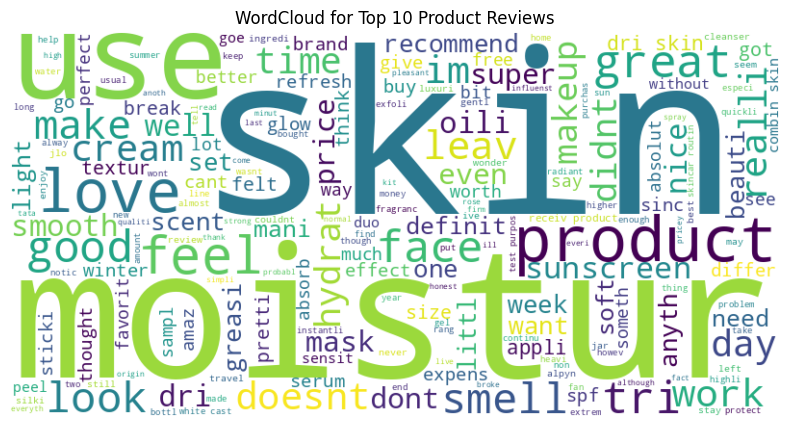

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter reviews for the top 10 products based on sentiment score
top10_reviews = df_updated[df_updated['product_id'].isin(top_10['product_id'])]

# Combine all reviews into a single string, dropping any missing values
text = " ".join(top10_reviews['review_text'].dropna().tolist())

# Generate a word cloud from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Top 10 Product Reviews")
plt.show()


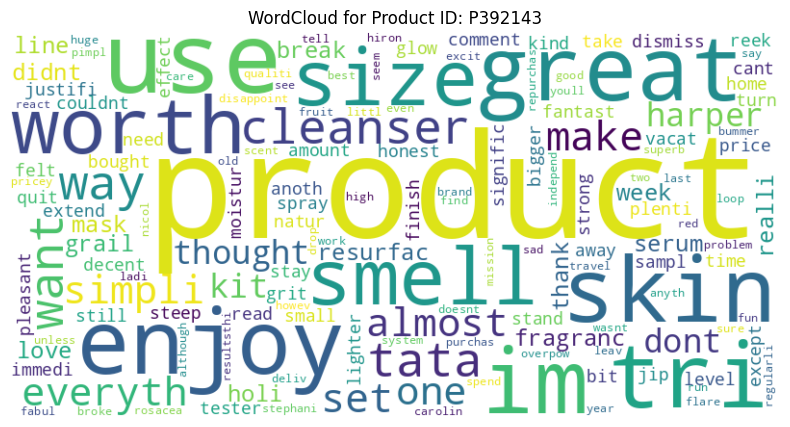

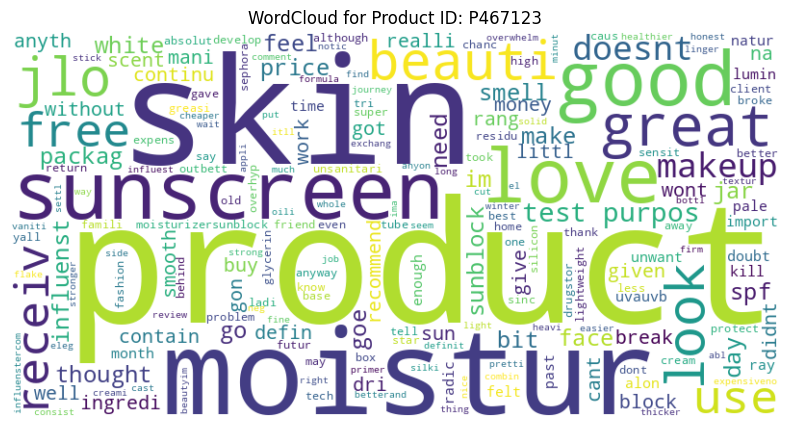

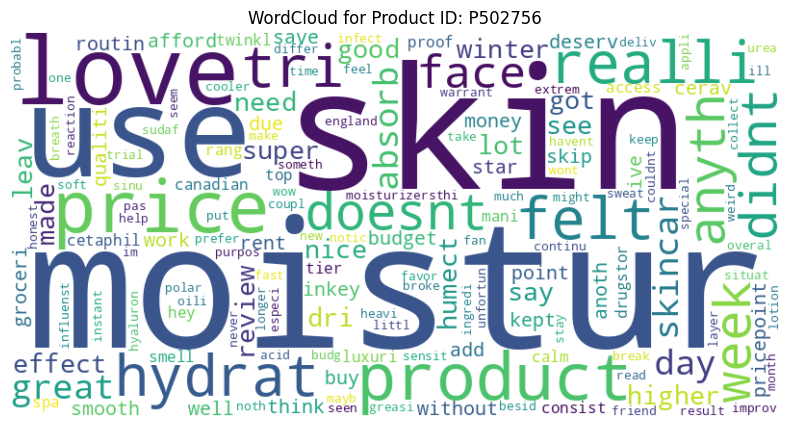

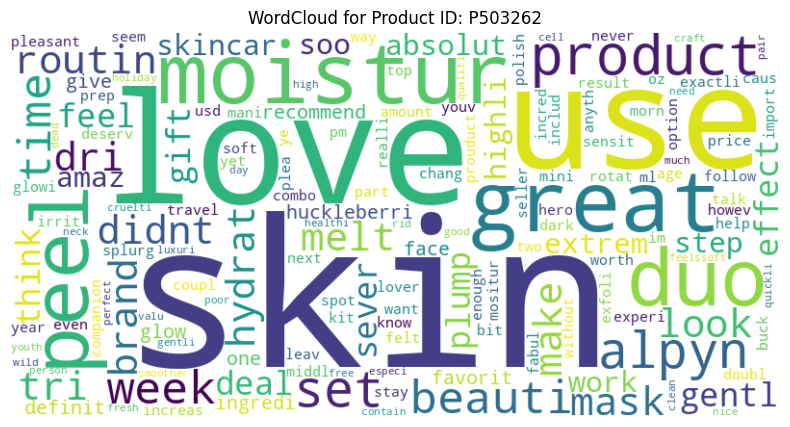

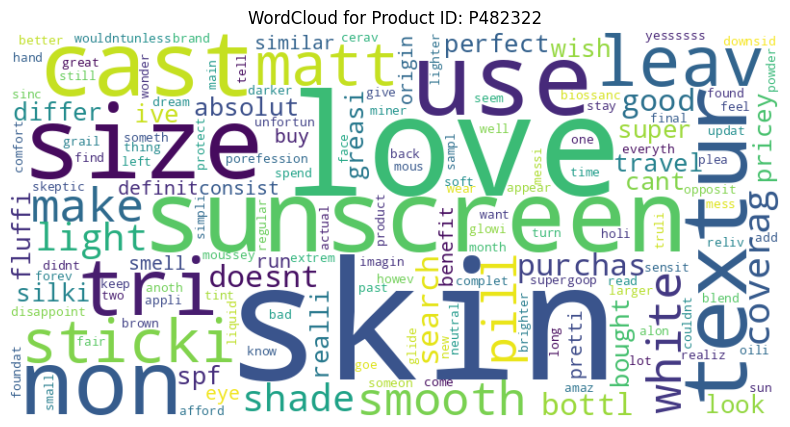

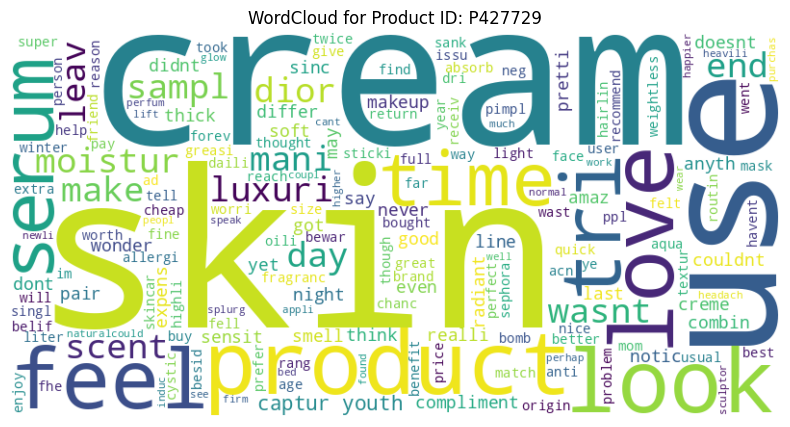

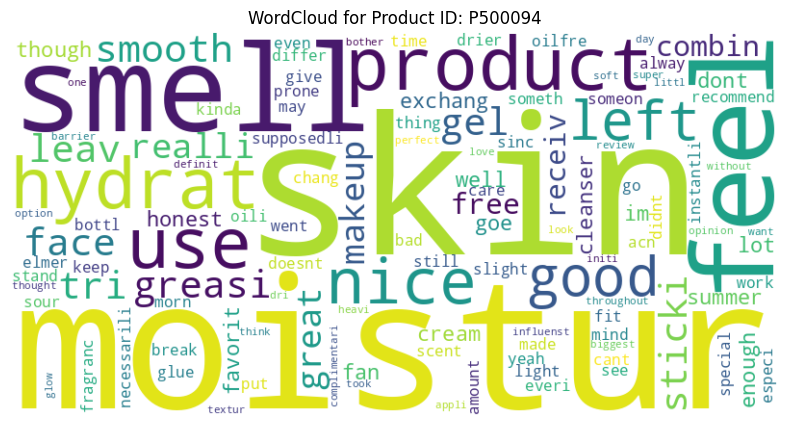

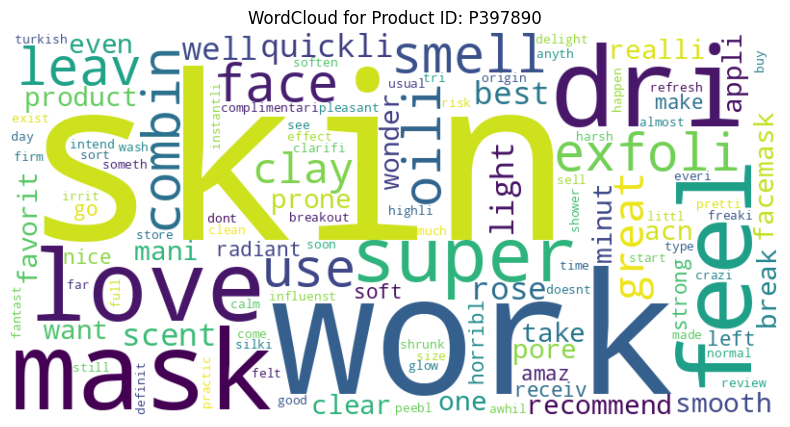

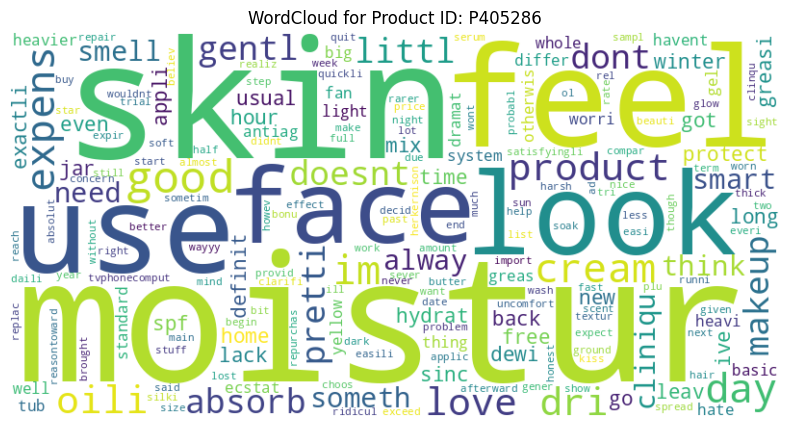

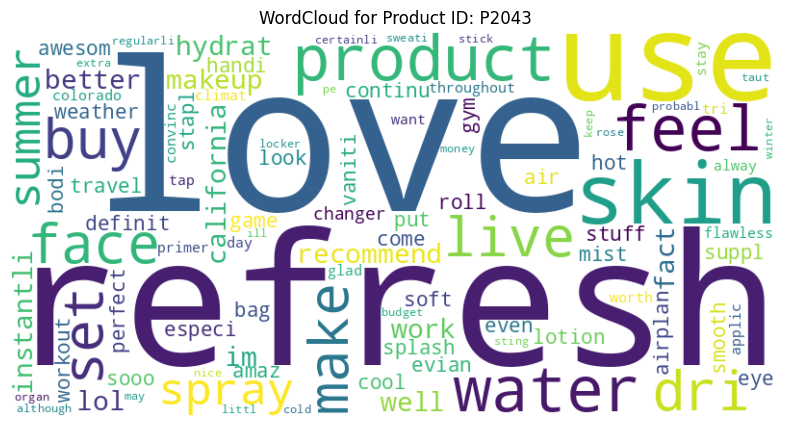

In [ ]:
# Iterate over each product_id and create a word cloud
for product in top_10['product_id']:
    # Combine all non-null review texts for the current product_id
    reviews_text = " ".join(top10_reviews[top10_reviews['product_id'] == product]['review_text'].dropna().tolist())

    # Generate the word cloud for the current product
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Product ID: {product}")
    plt.show()

###5.4.3 Worst 10 Products
- Selected bottom 10 products with the lowest sentiment score:

In [ ]:
Worst_10_produts.columns

Index(['product_id', 'review_text', 'sentiment_score', 'rating'], dtype='object')

In [ ]:
# Merging product details from data_product_info to enrich the worst 10 dataset
worst_10 = Worst_10_produts.merge(data_product_info[['product_id', 'product_name', 'brand_name', 'rating',
                                         'price_usd', 'highlights',  'primary_category',
                                         'secondary_category', 'tertiary_category']],
                      on='product_id', how='left') # Left join to keep only matching product IDs


# Display the final dataset with the worst 10 products based on sentiment score
worst_10

product_id                                        review_text  \
0    P438635  Smells, smells SO bad.  Ugh!  I wanted to like...   
1    P473185  underwhelming, saw no difference after 2 month...   
2    P429637  This stuff is trash. I got a sample out of cur...   
3    P455368  Wasn’t a huge fan- can’t tell that it did much...   
4    P392945  This is the worst product I’ve ever gotten fro...   
5    P447789  This is one of the worst products by BS. The s...   
6    P440929  Is there a reason why the mini version went fr...   
7    P437960  Worst under eye masks. It’s a waste of money, ...   
8    P429522  Hate this sunscreen it leaves that weird white...   
9    P410809  No results, and the product smells bad. It is ...   

   sentiment_score  rating_x  \
0        -0.189719         1   
1        -0.188418         2   
2        -0.180703         1   
3        -0.177593         2   
4        -0.173334         1   
5        -0.169491         1   
6        -0.168562         2   
7        -0.168224         1   
8        -0.165483         1   
9        -0.163039         1   

                                        product_name          brand_name  \
0  The Pout Sparkling Rosé Hyaluronic Acid Collag...           BeautyBio   
1  Water Drench Hyaluronic Cloud Makeup Removing ...   Peter Thomas Roth   
2                    The Moisturizing Cool Gel Cream              La Mer   
3            15% Vitamin C and EGF Brightening Serum      The INKEY List   
4        GENIUS Ultimate Anti-Aging Vitamin C+ Serum            Algenist   
5                                   Sun Drops SPF 50   Dr. Barbara Sturm   
6  Mini Original Skin Retexturizing Mask with Ros...             Origins   
7                  Baggage Claim Rose Gold Eye Masks       Wander Beauty   
8  Super Fluid Daily UV Defense Sunscreen Broad S...  Kiehl's Since 1851   
9     ELEVATE Firming & Lifting Contouring Eye Cream            Algenist   

   rating_y  price_usd                                         highlights  \
0    3.4268      39.00  ['Clean at Sephora', 'Plumping', 'Volumizing',...   
1    4.0000      32.00  ['Best for Dry, Combo, Normal Skin', 'Good for...   
2    3.6788     200.00  ['Best for Oily Skin', 'Good for: Dullness/Une...   
3    3.9446      15.99  ['Good for: Dullness/Uneven Texture', 'Vitamin...   
4    3.9825     118.00  ['Vegan', 'Collagen', 'Hypoallergenic', 'Good ...   
5    2.7164     150.00  ['Hyaluronic Acid', 'Gluten Free', 'Cruelty-Fr...   
6    4.4762      17.00  ['Vegan', 'Good for: Dullness/Uneven Texture',...   
7    4.0986      26.00  ['Vegan', 'allure 2020 Best of Beauty Award Wi...   
8    3.6048      68.00                                                NaN   
9    3.2581      72.00                                                NaN   

  primary_category      secondary_category        tertiary_category  
0         Skincare  Lip Balms & Treatments                      NaN  
1         Skincare               Cleansers    Face Wash & Cleansers  
2         Skincare            Moisturizers             Moisturizers  
3         Skincare              Treatments              Face Serums  
4         Skincare              Treatments              Face Serums  
5         Skincare               Sunscreen           Face Sunscreen  
6         Skincare               Mini Size                      NaN  
7         Skincare                Eye Care                Eye Masks  
8         Skincare               Sunscreen           Face Sunscreen  
9         Skincare                Eye Care  Eye Creams & Treatments

- Generated a word cloud for worst 10 products using the same approach.

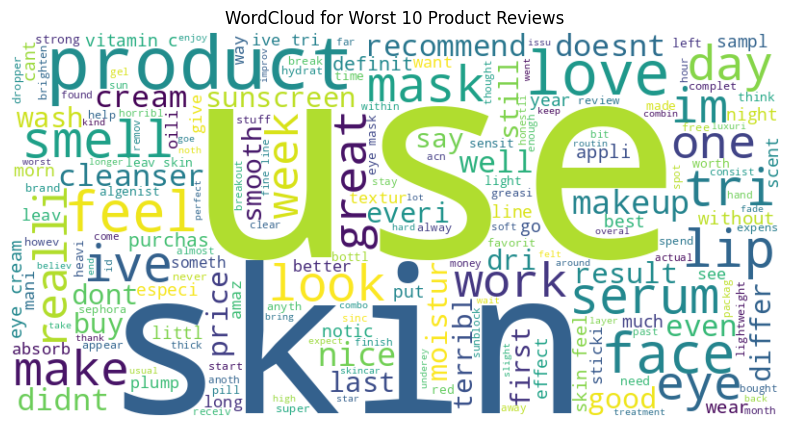

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter reviews for the worst 10 products based on sentiment score
worst10_reviews = df_updated[df_updated['product_id'].isin(worst_10['product_id'])]

# Combine all reviews into a single string, dropping any missing values
text = " ".join(worst10_reviews['review_text'].dropna().tolist())

# Generate a word cloud from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Worst 10 Product Reviews")
plt.show()


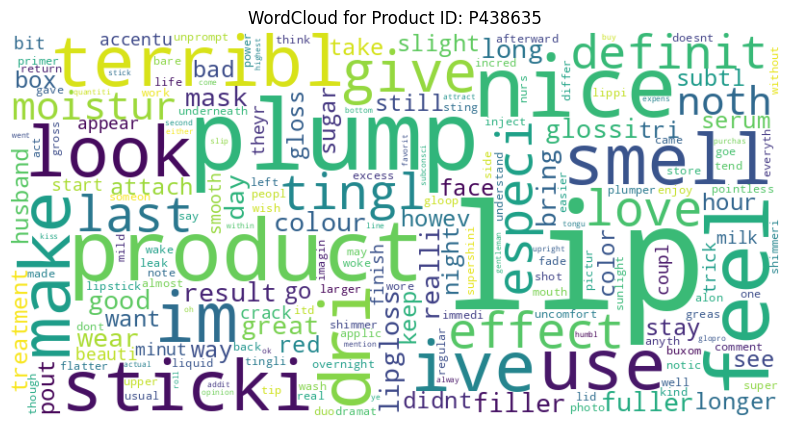

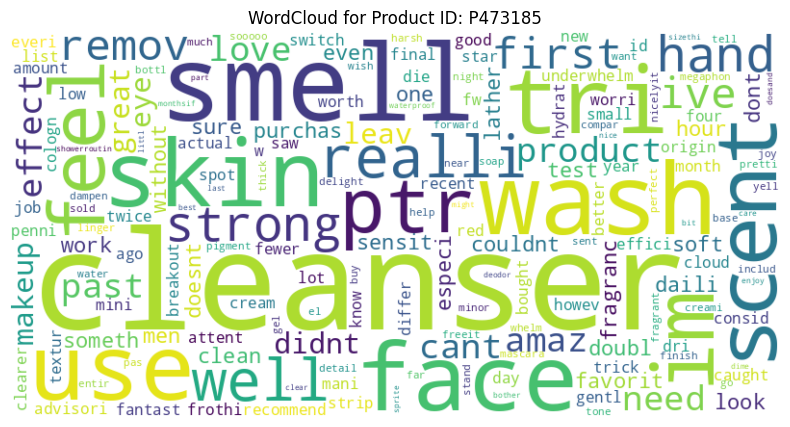

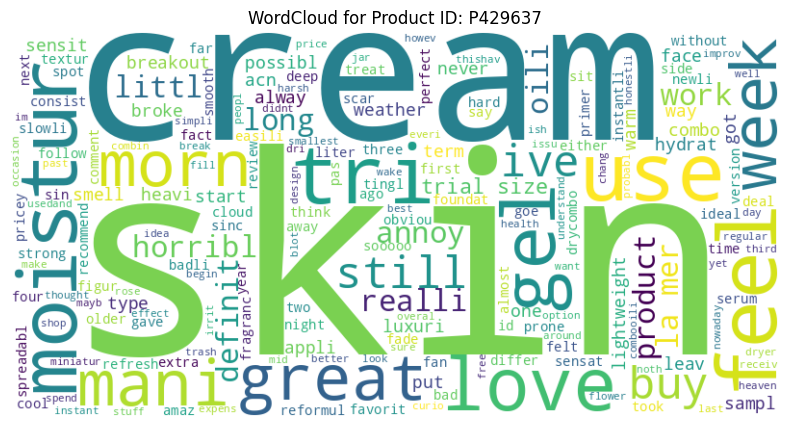

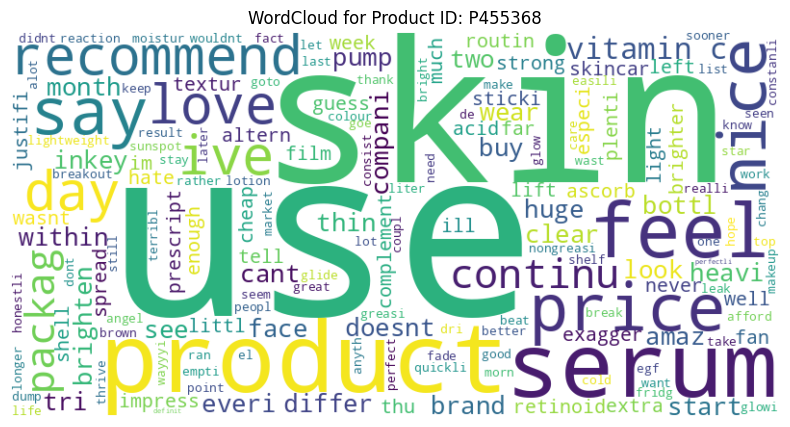

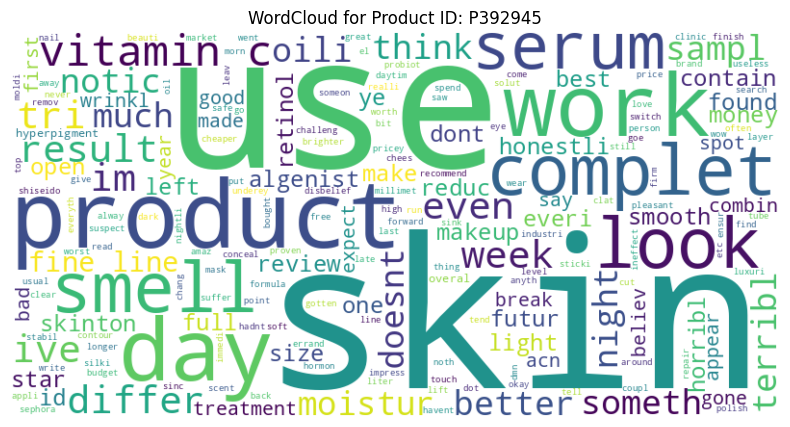

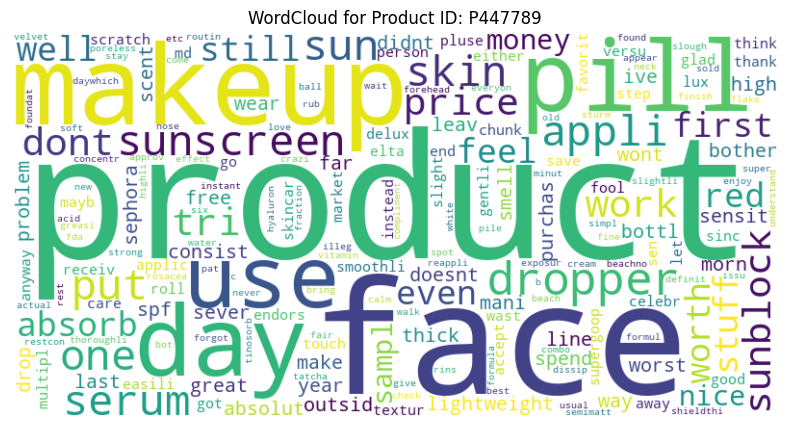

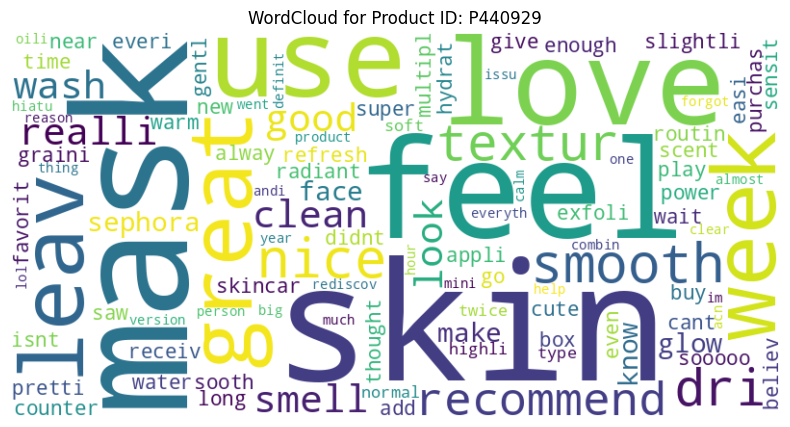

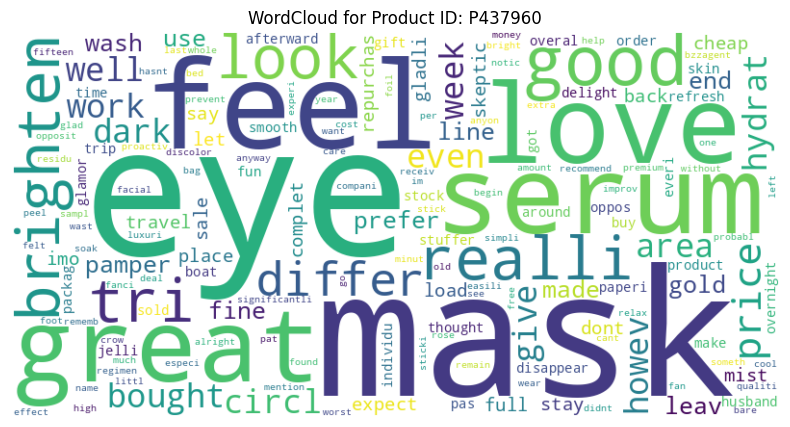

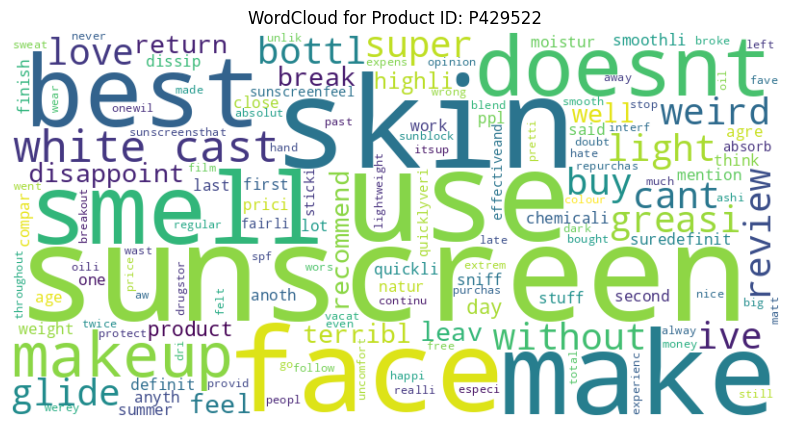

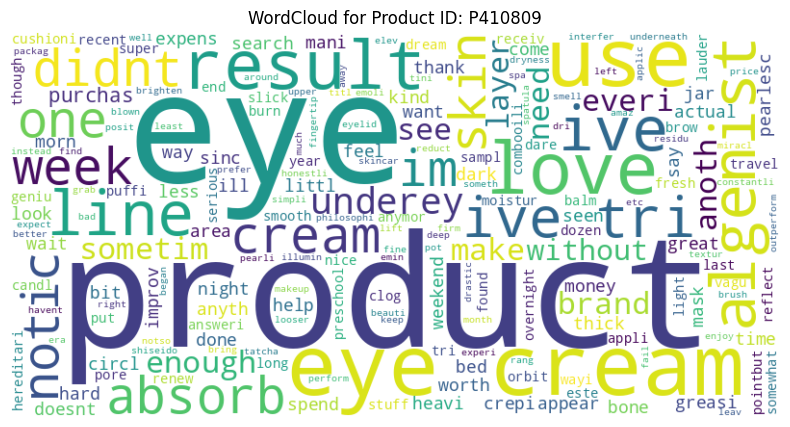

In [ ]:
# Iterate over each product_id and create a word cloud
for product in worst_10['product_id']:
    # Combine all non-null review texts for the current product_id
    reviews_text = " ".join(worst10_reviews[worst10_reviews['product_id'] == product]['review_text'].dropna().tolist())

    # Generate the word cloud for the current product
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Product ID: {product}")
    plt.show()

# 6 Summarization

## 6.1 Extractive

### 6.1.1 TextRank

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import networkx as nx
import nltk

# Download necessary NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

def sentence_similarity(sent1, sent2, stopwords=None):
    """Calculate cosine similarity between two sentences"""
    if stopwords is None:
        stopwords = []

    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]

    all_words = list(set(sent1 + sent2))

    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)

    # Build vectors
    for w in sent1:
        if w not in stopwords:
            vector1[all_words.index(w)] += 1

    for w in sent2:
        if w not in stopwords:
            vector2[all_words.index(w)] += 1

    return 1 - cosine_distance(vector1, vector2)

def build_similarity_matrix(sentences, stopwords):
    """Create similarity matrix among all sentences"""
    similarity_matrix = np.zeros((len(sentences), len(sentences)))

    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i != j:
                similarity_matrix[i][j] = sentence_similarity(
                    sentences[i], sentences[j], stopwords)

    return similarity_matrix

def generate_summary(text, num_sentences=2):
    """Generate a summary of the text with exactly 2 sentences"""
    # Handle empty or very short text
    if not text or len(text.strip()) == 0:
        return ""

    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Filter out very short sentences (likely not complete sentences)
    valid_sentences = [sent for sent in sentences if len(sent.split()) > 5]

    # If there are fewer sentences than requested, return all valid sentences
    if len(valid_sentences) <= num_sentences:
        return " ".join(valid_sentences)

    # Get stopwords
    stop_words = stopwords.words('english')

    # Create word tokens for each sentence
    sentence_tokens = [nltk.word_tokenize(sentence.lower()) for sentence in valid_sentences]

    # Calculate similarity matrix
    sentence_similarity_matrix = build_similarity_matrix(sentence_tokens, stop_words)

    # Rank sentences using PageRank algorithm
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Sort sentences by score and select top n
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(valid_sentences)), reverse=True)
    summary_sentences = [ranked_sentences[i][1] for i in range(min(num_sentences, len(ranked_sentences)))]

    # Reorder sentences based on their original position
    ordered_summary = [s for _, s in sorted([(valid_sentences.index(sentence), sentence) for sentence in summary_sentences])]

    # Join sentences to create summary
    summary = " ".join(ordered_summary)

    return summary

def summarize_product_reviews(df):
    """Create concise 2-sentence summaries for each product's reviews and calculate average ratings"""
    # Group reviews by product_id
    grouped = df.groupby('product_id')

    # Initialize lists to store results
    product_ids = []
    summaries = []
    avg_ratings = []

    for product_id, group in grouped:
        # Combine all reviews for this product, but limit to 50 reviews max to avoid excessively long input
        # Sort by rating to prioritize more helpful reviews (assuming higher ratings tend to be more informative)
        top_reviews = group.sort_values(by='rating', ascending=False).head(50)
        combined_text = ' '.join(top_reviews['review_text'])

        # Generate a 2-sentence summary
        summary = generate_summary(combined_text, 2)

        # Calculate average rating for this product
        avg_rating = group['rating'].mean().round(2)

        # Store results
        product_ids.append(product_id)
        summaries.append(summary)
        avg_ratings.append(avg_rating)

    # Create result dataframe
    df_summarization = pd.DataFrame({
        'product_id': product_ids,
        'summary': summaries,
        'avg_rating': avg_ratings
    })

    return df_summarization

# Main execution
df_summarization = summarize_product_reviews(df_updated)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import networkx as nx
import nltk
import numpy as np
import pandas as pd
import random

# Download necessary NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

def sentence_similarity(sent1, sent2, stopwords=None):
    """Calculate cosine similarity between two sentences"""
    if stopwords is None:
        stopwords = []

    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]

    all_words = list(set(sent1 + sent2))

    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)

    # Build vectors
    for w in sent1:
        if w not in stopwords:
            vector1[all_words.index(w)] += 1

    for w in sent2:
        if w not in stopwords:
            vector2[all_words.index(w)] += 1

    return 1 - cosine_distance(vector1, vector2)

def build_similarity_matrix(sentences, stopwords):
    """Create similarity matrix among all sentences"""
    similarity_matrix = np.zeros((len(sentences), len(sentences)))

    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i != j:
                similarity_matrix[i][j] = sentence_similarity(
                    sentences[i], sentences[j], stopwords)

    return similarity_matrix

def generate_summary(text, num_sentences=2):
    """Generate a summary of the text with exactly 2 sentences"""
    # Handle empty or very short text
    if not text or len(text.strip()) == 0:
        return ""

    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Filter out very short sentences (likely not complete sentences)
    valid_sentences = [sent for sent in sentences if len(sent.split()) > 5]

    # If there are fewer sentences than requested, return all valid sentences
    if len(valid_sentences) <= num_sentences:
        return " ".join(valid_sentences)

    # Get stopwords
    stop_words = stopwords.words('english')

    # Create word tokens for each sentence
    sentence_tokens = [nltk.word_tokenize(sentence.lower()) for sentence in valid_sentences]

    # Calculate similarity matrix
    sentence_similarity_matrix = build_similarity_matrix(sentence_tokens, stop_words)

    # Rank sentences using PageRank algorithm
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Sort sentences by score and select top n
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(valid_sentences)), reverse=True)
    summary_sentences = [ranked_sentences[i][1] for i in range(min(num_sentences, len(ranked_sentences)))]

    # Reorder sentences based on their original position
    ordered_summary = [s for _, s in sorted([(valid_sentences.index(sentence), sentence) for sentence in summary_sentences])]

    # Join sentences to create summary
    summary = " ".join(ordered_summary)

    return summary

def create_random_sample(df, num_products=10, reviews_per_product=10):
    """
    Create a random sample of reviews with specified number of products
    and reviews per product
    """
    # Get all unique product IDs that have at least the required number of reviews
    product_counts = df['product_id'].value_counts()
    eligible_products = product_counts[product_counts >= reviews_per_product].index.tolist()

    # Randomly select the specified number of products
    if len(eligible_products) < num_products:
        print(f"Warning: Only {len(eligible_products)} products have {reviews_per_product}+ reviews")
        selected_products = eligible_products
    else:
        selected_products = random.sample(eligible_products, num_products)

    # Print the selected product IDs
    print("Selected Product IDs for summarization:")
    for i, product_id in enumerate(selected_products, 1):
        print(f"{i}. {product_id}")

    # Create a dataframe to store the sampled reviews
    df_sample = pd.DataFrame()

    # For each selected product, randomly sample the specified number of reviews
    for product_id in selected_products:
        product_reviews = df[df['product_id'] == product_id]
        sampled_reviews = product_reviews.sample(reviews_per_product)
        df_sample = pd.concat([df_sample, sampled_reviews])

    return df_sample, selected_products

def summarize_product_reviews(df, selected_products):
    """Create concise 2-sentence summaries for each product's reviews and calculate average ratings"""
    # Initialize lists to store results
    product_ids = []
    summaries = []
    avg_ratings = []

    # Process each selected product
    for product_id in selected_products:
        # Get all reviews for this product from the sample
        product_reviews = df[df['product_id'] == product_id]

        # Combine all reviews for this product
        combined_text = ' '.join(product_reviews['review_text'])

        # Generate a 2-sentence summary
        summary = generate_summary(combined_text, 2)

        # Calculate average rating for this product
        avg_rating = product_reviews['rating'].mean().round(2)

        # Store results
        product_ids.append(product_id)
        summaries.append(summary)
        avg_ratings.append(avg_rating)

    # Create result dataframe
    df_summarization = pd.DataFrame({
        'product_id': product_ids,
        'summary': summaries,
        'avg_rating': avg_ratings
    })

    return df_summarization

# Main execution
# Create random sample of 10 products with 10 reviews each
df_updated_sum_random, selected_products = create_random_sample(df_updated, 10, 10)

# Display the random sample dataset info
print(f"\nCreated random sample with {len(df_updated_sum_random)} reviews from {len(selected_products)} products")
print(f"Sample shape: {df_updated_sum_random.shape}")

# Generate summaries based on the random sample
df_summarization = summarize_product_reviews(df_updated_sum_random, selected_products)

# Display the summarization results
print("\nProduct Review Summarization Results:")
print(df_summarization)

Selected Product IDs for summarization:
1. P482008
2. P500472
3. P417323
4. P483661
5. P443841
6. P442858
7. P466123
8. P469520
9. P446909
10. P500785

Created random sample with 100 reviews from 10 products
Sample shape: (100, 5)

Product Review Summarization Results:
  product_id                                            summary  avg_rating
0    P482008  readi summer excit tri product person prefer g...         3.7
1    P500472  product amaz love thick hydrat skin realli wel...         4.5
2    P417323  realli love use day notic skin brighter less d...         4.4
3    P483661  hard pas smooth didnt anyth skin incred retino...         3.8
4    P443841  told could buy highpot vitamin c cream would s...         3.2
5    P442858  cool sure made face soft didnt notic long term...         4.4
6    P466123  product beauti worth everi penni use ordinari ...         4.0
7    P469520  love foam cleanser paula choic product fave on...         4.6
8    P446909  alway love supergoop wait make s

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_updated_sum_random

rating                                        review_text product_id  \
18029       5  readi summer excit tri product person prefer g...    P482008   
18022       5  product make perfect natur color tan pale skin...    P482008   
18026       2  orang orang definit easi appli stay sticki hou...    P482008   
18021       5  tri mani self tan product top fav upon initi a...    P482008   
18028       5  skin glow use product actual first time use se...    P482008   
...       ...                                                ...        ...   
19637       5                    love line afford make skin glow    P500785   
19639       5  use kit day love itmi skin mora healthier glow...    P500785   
19642       5  alreadi use glow serum everyday mask toner mak...    P500785   
19643       4  great kit enjoy item thing mask tad heavi face...    P500785   
19635       5  set great sure want tri commit full size price...    P500785   

      sentiment_vader sentiment_textblob  
18029        positive           positive  
18022        positive           positive  
18026        positive           positive  
18021        positive           positive  
18028        positive           positive  
...               ...                ...  
19637        positive           positive  
19639        positive           positive  
19642        positive           positive  
19643        positive           positive  
19635        positive           positive  

[100 rows x 5 columns]

In [ ]:
# Display settings for wide DataFrames
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

# View the results
display(df_summarization)

product_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      summary  avg_rating
0    P482008                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## 6.2 Abstractive

### 6.2.1 BART model / T5

In [ ]:
import pandas as pd
import numpy as np
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
import torch
from tqdm import tqdm

def abstractive_summarization(df, text_column='review_text', group_column='product_id',
                             max_reviews_per_product=50, max_length=8192):
    """
    Perform abstractive summarization of reviews grouped by product ID.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing review texts and product IDs
    text_column : str
        Name of column containing review text
    group_column : str
        Name of column to group by (product ID)
    max_reviews_per_product : int
        Maximum number of reviews to consider per product (to avoid memory issues)
    max_length : int
        Maximum number of tokens to process in one batch

    Returns:
    --------
    pandas.DataFrame
        DataFrame with product IDs and their abstractive summaries
    """
    print("Loading summarization model...")
    # Use BART large CNN model which is good for abstractive summarization
    model_name = "facebook/bart-large-cnn"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    # Use GPU if available
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    summarizer = pipeline("summarization", model=model, tokenizer=tokenizer, device=0 if device == "cuda" else -1)

    results = []

    # Group reviews by product ID
    grouped = df.groupby(group_column)

    for product_id, group in tqdm(grouped, desc="Summarizing reviews by product"):
        # Sample reviews if there are too many for a single product
        if len(group) > max_reviews_per_product:
            reviews = group[text_column].sample(max_reviews_per_product, random_state=42).tolist()
        else:
            reviews = group[text_column].tolist()

        # Clean and prepare reviews
        reviews = [review for review in reviews if isinstance(review, str) and len(review.strip()) > 0]

        if not reviews:
            results.append({
                'product_id': product_id,
                'summary': "No valid reviews found for this product."
            })
            continue

        # Concatenate reviews with separators
        concatenated_reviews = " ".join(reviews)

        # Chunking for long texts
        if len(concatenated_reviews) > max_length:
            # Simple truncation approach
            concatenated_reviews = concatenated_reviews[:max_length]

        try:
            # Generate summary
            summary = summarizer(concatenated_reviews,
                                max_length=150,
                                min_length=50,
                                do_sample=False)[0]['summary_text']

            results.append({
                'product_id': product_id,
                'summary': summary
            })
        except Exception as e:
            print(f"Error summarizing product {product_id}: {str(e)}")
            results.append({
                'product_id': product_id,
                'summary': f"Error generating summary: {str(e)}"
            })

    return pd.DataFrame(results)

# Example usage
# Load your dataframe
# df_updated_sum_random = pd.read_csv('your_file.csv')

# Generate summaries
# summaries_df = abstractive_summarization(df_updated_sum_random)
# print(summaries_df.head())

# To save the results
# summaries_df.to_csv('product_review_summaries.csv', index=False)


# Alternative implementation using BART with batched processing for efficiency
def batch_abstractive_summarization(df, text_column='review_text', group_column='product_id',
                                  max_reviews_per_product=20, batch_size=4):
    """
    Perform abstractive summarization with batched processing
    """
    print("Loading summarization model...")
    model_name = "facebook/bart-large-cnn"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    results = []

    # Group reviews by product ID
    grouped = df.groupby(group_column)

    # Process in batches
    product_ids = list(grouped.groups.keys())

    for i in tqdm(range(0, len(product_ids), batch_size), desc="Processing batches"):
        batch_product_ids = product_ids[i:i+batch_size]
        batch_texts = []

        for product_id in batch_product_ids:
            group = grouped.get_group(product_id)

            # Sample reviews if there are too many
            if len(group) > max_reviews_per_product:
                reviews = group[text_column].sample(max_reviews_per_product, random_state=42).tolist()
            else:
                reviews = group[text_column].tolist()

            # Clean and prepare reviews
            reviews = [review for review in reviews if isinstance(review, str) and len(review.strip()) > 0]

            if not reviews:
                results.append({
                    'product_id': product_id,
                    'summary': "No valid reviews found for this product."
                })
                continue

            # Concatenate reviews
            text = " ".join(reviews)
            batch_texts.append(text)

        if not batch_texts:
            continue

        # Generate summaries for the batch
        try:
            inputs = tokenizer(batch_texts, max_length=1024, return_tensors="pt", padding=True, truncation=True).to(device)
            summary_ids = model.generate(
                inputs.input_ids,
                max_length=150,
                min_length=40,
                num_beams=4,
                no_repeat_ngram_size=3,
                early_stopping=True
            )
            summaries = tokenizer.batch_decode(summary_ids, skip_special_tokens=True)

            for product_id, summary in zip(batch_product_ids[:len(summaries)], summaries):
                results.append({
                    'product_id': product_id,
                    'summary': summary
                })

        except Exception as e:
            print(f"Error in batch processing: {str(e)}")
            for product_id in batch_product_ids:
                results.append({
                    'product_id': product_id,
                    'summary': f"Error generating summary: {str(e)}"
                })

    return pd.DataFrame(results)


# Alternative implementation using T5 model which can handle longer inputs
def t5_abstractive_summarization(df, text_column='review_text', group_column='product_id',
                               max_reviews_per_product=30):
    """
    Perform abstractive summarization using T5 model
    """
    print("Loading T5 summarization model...")
    model_name = "t5-base"  # Can also use t5-small or t5-large depending on resources
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    results = []

    # Group reviews by product ID
    grouped = df.groupby(group_column)

    for product_id, group in tqdm(grouped, desc="Summarizing with T5"):
        # Sample reviews if there are too many
        if len(group) > max_reviews_per_product:
            reviews = group[text_column].sample(max_reviews_per_product, random_state=42).tolist()
        else:
            reviews = group[text_column].tolist()

        # Clean and prepare reviews
        reviews = [review for review in reviews if isinstance(review, str) and len(review.strip()) > 0]

        if not reviews:
            results.append({
                'product_id': product_id,
                'summary': "No valid reviews found for this product."
            })
            continue

        # Concatenate reviews with separators
        concatenated_reviews = " ".join(reviews)

        try:
            # T5 requires a "summarize: " prefix for summarization tasks
            input_text = "summarize: " + concatenated_reviews

            # Tokenize and generate summary
            inputs = tokenizer(input_text, max_length=1024, return_tensors="pt", truncation=True).to(device)
            summary_ids = model.generate(
                inputs.input_ids,
                max_length=150,
                min_length=40,
                num_beams=4,
                no_repeat_ngram_size=3,
                early_stopping=True
            )
            summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

            results.append({
                'product_id': product_id,
                'summary': summary
            })

        except Exception as e:
            print(f"Error summarizing product {product_id}: {str(e)}")
            results.append({
                'product_id': product_id,
                'summary': f"Error generating summary: {str(e)}"
            })

    return pd.DataFrame(results)


# Example of combining multiple techniques for better summaries
def hybrid_summarization(df, text_column='review_text', group_column='product_id'):
    """
    Combine multiple summarization techniques for better results
    """
    # First get BART summaries
    bart_summaries = abstractive_summarization(df, text_column, group_column)

    # Optional: Get T5 summaries
    # t5_summaries = t5_abstractive_summarization(df, text_column, group_column)

    # You could combine them for a more robust summary
    # final_summaries = pd.merge(bart_summaries, t5_summaries, on='product_id', suffixes=('_bart', '_t5'))

    return bart_summaries

# Main execution
if __name__ == "__main__":
    # Load your dataframe here
    # df_updated_sum_random = pd.read_csv('your_file.csv')

    # Choose one of the summarization methods
    # summaries_df = abstractive_summarization(df_updated_sum_random)
    # OR:
    # summaries_df = batch_abstractive_summarization(df_updated_sum_random)
    # OR:
    # summaries_df = t5_abstractive_summarization(df_updated_sum_random)

    # To save the results
    # summaries_df.to_csv('product_review_summaries.csv', index=False)

    print("Summarization complete. Results saved to product_review_summaries.csv")

Summarization complete. Results saved to product_review_summaries.csv


In [ ]:
summaries_df_bart = batch_abstractive_summarization(df_updated_sum_random)

Loading summarization model...


Processing batches: 100%|██████████| 3/3 [05:24<00:00, 108.17s/it]


In [ ]:
summaries_df_bart

product_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                summary
0    P417323                                                                                                                                                                                                                                                      realli love use day notic skin brighter less discolor love skin feel clean wash want love product broke badli time use best radianc boost product couldv bought buy without serum booster product find work saw instant result amaz product. tri mani expens product incred claim realli noth skin product everyon tri use half contain time mix.
1    P442858                                                                                                                                                                                                                                                                                                                           cool sure made face soft didnt notic long term effect weird tacki feel dri absolut love light weight smell amaz leav skin soft hydrat love way made face feel next morn came nice packag bottl cute well thing troubl sleep face receiv product complimentari review purpos.
2    P443841  told could buy highpot vitamin c cream would slap face call liar okaymayb stuff fantast brown girl fight constant battl pih usual take week dark spot heal particularli bad one result botch selfextract know took day heal use cream wouldnt use dri face pat face either water favorit hydrat mist appli cream use cant see use anyth el wouldnt recommend product sensit skin like haveit sting realli bad feel harsh pretti good vitamin c money prefer oil instead bit matt pay ingredi good job love vit c cream ye gritti mix daili moistur spread smoothli give boost vit c made differ skin.
3    P446909                                                                                                                                                                                                                    alway love supergoop wait make sunscreen specif cater skin type wait incred sensit combin love live dri oili doesnt caus pill play well makeup also rub right eye absolut issu fantast buy unless skin get oili switch matt finish spf supergoops tri less expens altern murad citi skin defens broad spectrum spf lightweight miner sunscreen light pinkpeach tint even skin tone.
4    P466123                                                                                                                                                                                                                          product beauti worth everi penni use ordinari niacinamid zinc serum sinc last decemb need help heal fresh acn scar hadnt realli done much skin overtim purchas im big fan glow recip watermelon moistur sleep mask ive look illumin primer wear foundat colder month start use primer love purpos start use highlight top foundat even use serum night help skin much incred.
5    P469520                                                                                                                                                                                                                                                                                                                                                 love foam cleanser paula choic product fave one take makeup best compar other

In [ ]:
summaries_df_t5 = t5_abstractive_summarization(df_updated_sum_random)

Loading T5 summarization model...


Summarizing with T5: 100%|██████████| 10/10 [04:29<00:00, 26.91s/it]


In [ ]:
summaries_df_t5

product_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            summary
0    P417323                                                         realli love use day notic skin brighter less discolor love skin feel clean wash want love product broke badli time use best radianc boost product couldv bought buy without serum booster product find work saw instant result amaz product definit holi grail product tri use half contain time mix hand drop water past put face neck ill leav face hour wash face cloth rins water ill end extrem soft smooth skin definit look radiant time use week .
1    P442858                                                                                                                                                                                                                                                        babi soft honest opinion think everyon need dri skin suffer im total hook receiv product complimentari influenst review purpos littl nervou tri fan scent rose honestli amaz soft wish got earlier winter month sleep mask beat product ever use face got .
2    P443841                                                                                                                                     vit c serum ye gritti mix daili moistur spread smoothli feel dont feel like absorb well skin feel tingli sensat also doesnt layer well ive use better vitamin c product dont think ill repurchase though your tight budget adequ shouldv read review aw product luckili tri hand first shock tacki like never absorb there layer top skin normal tri find way finish product .
3    P446909                                                                                                                                                                                                                                                                                                                  spf supergoop tri less expens altern murad citi skin defens broad spectrum miner sunscreen light pinkpeach tint even skin tone . if skin feels greasi use make feel like there anoth layer skin .
4    P466123                                                                                                                                                                                                                dri skin use differs product niacinamid without one caus break thought might face sensit issu tri neckchestarm notic broken end day well use primer base mix foundat make skin shine look radiant . glow recip sit well makeup skin look plump dewi thick sticki truli allow makeup sit nice skin .
5    P469520                                                                                                       famou brand hype cleanser howev new favorit wash face multipl time cours day didnt dri im impress wish littl afford lol id total use whole bodi wash perfect price point . love fragranc free cream cleanser rather than foam face wash realli good job clean skin without strip . even remov makeup doesnt leav skin feel irrit red feel like skin look refresh even dare say plump healthi look huge win .
6    P482008                                                                                                                                                                                                                tri isl paradis self tan oil mist would recommend color great look amaz got color light made skin look exactli hope work awar didnt start shake bottl spray leg wow spray lot oil shade work well ligh

### 6.2.2 Gemini API (LLM)

In [ ]:
import time
import random
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold
from tenacity import retry, stop_after_attempt, wait_exponential

In [ ]:
genai.configure(api_key="XXX")

In [ ]:
generation_config = {
    "temperature": 0.7,
    "top_p": 0.95,
    "top_k": 64,
    "max_output_tokens": 8192,
    "response_mime_type": "text/plain",
}
safety_settings = {
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_ONLY_HIGH,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_ONLY_HIGH,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_ONLY_HIGH,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_ONLY_HIGH
}
model = genai.GenerativeModel(
    model_name="gemini-1.5-flash",
    generation_config=generation_config,
    safety_settings=safety_settings
)

In [ ]:
import pandas as pd
import numpy as np
import time
import traceback
from tenacity import retry, stop_after_attempt, wait_exponential

# Define functions
@retry(
    stop=stop_after_attempt(5),  # Try up to 5 times
    wait=wait_exponential(multiplier=2, min=4, max=60)  # Start with 4s, then exponential backoff up to 60s
)
def generate_summary_with_retry(prompt):
    """Generate summary with retry logic for API call failures"""
    try:
        response = model.generate_content(prompt)
        return response.text
    except Exception as e:
        print(f"Error generating summary: {e}")
        raise e

def extract_key_features(reviews_text):
    """Extract key features using Gemini"""
    prompt = f"""
    Based on the following product reviews, identify the top 3-5 key features or aspects that customers mention most frequently.
    Just list the features without explanation.

    REVIEWS:
    {reviews_text[:2000]}  # Truncating to reduce token usage
    """

    try:
        features = generate_summary_with_retry(prompt)
        # Clean up the response - remove numbering, bullets, etc.
        features = features.replace('- ', '').replace('* ', '')
        features = features.replace('\n', ', ')
        return features
    except:
        # Fallback to simple keyword extraction if Gemini fails
        common_features = ["quality", "price", "design", "functionality", "performance"]
        return ", ".join(common_features[:3])

def summarize_reviews_with_gemini(reviews_text, product_id, avg_rating):
    """Generate a coherent 2-sentence summary of product reviews using Gemini"""
    prompt = f"""
    Summarize the following product reviews into exactly TWO clear, coherent sentences that capture the main points.
    Focus on key insights and overall sentiment. Make sure these are complete, grammatically correct sentences.

    Product ID: {product_id}
    Average Rating: {avg_rating}/5

    REVIEWS:
    {reviews_text[:3000]}  # Truncating to reduce token usage

    YOUR SUMMARY (exactly 2 sentences):
    """

    try:
        summary = generate_summary_with_retry(prompt)
        # Clean up the response
        summary = summary.replace('\n', ' ').strip()
        return summary
    except Exception as e:
        print(f"Failed to generate summary for product {product_id}: {e}")
        return "No summary available due to processing error."

def process_product_with_interval(product_id, reviews, delay_seconds=3):
    """Process a single product with proper delay to avoid rate limits"""
    # Calculate average rating from the reviews
    avg_rating = round(reviews['rating'].mean(), 2)

    # Combine all reviews for this product into a single text
    combined_text = " ".join(reviews['review_text'])

    # Extract key features with delay
    key_features = extract_key_features(combined_text)
    time.sleep(delay_seconds)  # Wait between API calls

    # Generate summary with delay
    summary = summarize_reviews_with_gemini(combined_text, product_id, avg_rating)
    time.sleep(delay_seconds)  # Wait between API calls

    return {
        'product_id': product_id,
        'avg_rating': avg_rating,
        'review_count': len(reviews),
        'key_features': key_features,
        'summary': summary
    }

def summarize_products(df, delay_seconds=3):
    """Process all products and generate summaries using proper rate limiting"""
    # Make a copy to avoid modifying the original dataframe
    df = df.copy()

    # Ensure the review_text column is string type
    df['review_text'] = df['review_text'].fillna('').astype(str)

    # Ensure rating is numeric
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

    # Get unique product IDs
    product_ids = df['product_id'].unique()

    # Display information about the dataset
    print(f"\nFound {len(product_ids)} unique products with a total of {len(df)} reviews")
    print(f"Each product has approximately {len(df) / len(product_ids):.1f} reviews on average")

    # Initialize list to store results
    results = []

    # Process each product
    for i, product_id in enumerate(product_ids):
        print(f"Processing product {i+1}/{len(product_ids)}: {product_id}")

        # Get all reviews for this product
        product_reviews = df[df['product_id'] == product_id]

        try:
            # Process the product
            result = process_product_with_interval(product_id, product_reviews, delay_seconds)
            results.append(result)

            # Print brief result
            print(f"  ✓ Summary: \"{result['summary'][:50]}...\"")

        except Exception as e:
            print(f"  ✗ Failed to process product {product_id}: {e}")

            # Add a partial result with error message
            results.append({
                'product_id': product_id,
                'avg_rating': round(product_reviews['rating'].mean(), 2),
                'review_count': len(product_reviews),
                'key_features': "Processing error",
                'summary': f"Error: {str(e)[:100]}"
            })

            # If we hit a serious API error, wait longer before continuing
            time.sleep(delay_seconds * 2)

    print("\nProcessing complete!")

    # Create result dataframe
    result_df = pd.DataFrame(results)

    return result_df

def display_summary_examples(df_summarized, num_examples=None):
    """Display example summaries with all relevant data"""
    if len(df_summarized) == 0:
        print("No summaries generated. Check your input data.")
        return

    print(f"\n{'='*80}\nSUMMARIZED PRODUCT REVIEWS\n{'='*80}")

    # If num_examples is None, display all. Otherwise, limit to the specified number.
    display_df = df_summarized if num_examples is None else df_summarized.head(num_examples)

    # Display each summarized product
    for i, row in display_df.iterrows():
        print(f"\nProduct ID: {row['product_id']}")
        print(f"Average Rating: ⭐ {row['avg_rating']} / 5.0")
        print(f"Number of Reviews: {row['review_count']}")
        print(f"Key Features: {row['key_features']}")
        print(f"Summary: \"{row['summary']}\"")
        print('-' * 80)

    print(f"\nTotal products summarized: {len(df_summarized)}")

def save_summaries_to_csv(df_summarized, filename="gemini_product_summaries.csv"):
    """Save the summarized reviews to a CSV file"""
    try:
        df_summarized.to_csv(filename, index=False)
        print(f"\nSummaries successfully saved to {filename}")
    except Exception as e:
        print(f"Error saving to CSV: {e}")

def run_summarization(df, delay_seconds=3, save_csv=True):
    """Run the full summarization process and display results"""
    print("Starting Gemini-powered product review summarization...")

    # Check that dataframe has required columns
    required_columns = ['product_id', 'review_text', 'rating']
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"Error: Missing required columns: {missing_columns}")
        print(f"Available columns: {list(df.columns)}")
        return None

    # Display input data summary
    print(f"\nInput data summary:")
    print(f"Total reviews: {len(df)}")
    print(f"Unique products: {df['product_id'].nunique()}")
    print(f"Average review length: {df['review_text'].str.len().mean():.1f} characters")

    # Time the summarization process
    start_time = time.time()

    # Run the summarization with proper delay
    summarized_df = summarize_products(df, delay_seconds=delay_seconds)

    # Print execution time
    execution_time = time.time() - start_time
    print(f"\nSummarization completed in {execution_time:.2f} seconds")

    # Display all summaries (since you only have 10 products)
    display_summary_examples(summarized_df, num_examples=None)

    # Save to CSV if requested
    if save_csv and len(summarized_df) > 0:
        save_summaries_to_csv(summarized_df)

    return summarized_df

# Main execution block
try:
    # Check if the dataframe exists
    if 'df_updated_sum_random' in globals():
        print(f"Processing df_updated_sum_random which has {len(df_updated_sum_random)} reviews")

        # Run the summarization on your dataframe
        gemini_summaries = run_summarization(
            df_updated_sum_random,
            delay_seconds=3,      # 3 second delay between API calls
        )
    else:
        print("\nERROR: df_updated_sum_random dataframe not found.")
        print("Make sure you've defined df_updated_sum_random before running this code.")
        print("You should have a dataframe with columns: 'product_id', 'review_text', and 'rating'")

except Exception as e:
    print(f"\nError: {str(e)}")
    print("Stack trace:")
    traceback.print_exc()

Processing df_updated_sum_random which has 100 reviews
Starting Gemini-powered product review summarization...

Input data summary:
Total reviews: 100
Unique products: 10
Average review length: 200.2 characters

Found 10 unique products with a total of 100 reviews
Each product has approximately 10.0 reviews on average
Processing product 1/10: P482008
  ✓ Summary: "Customer reviews for product P482008 are mixed, wi..."
Processing product 2/10: P500472
  ✓ Summary: "Customers overwhelmingly praise the P500472 moistu..."
Processing product 3/10: P417323
  ✓ Summary: "Customers overwhelmingly praise this Vitamin C pro..."
Processing product 4/10: P483661
  ✓ Summary: "Many reviewers praised this bakuchiol serum for it..."
Processing product 5/10: P443841
  ✓ Summary: "Customer reviews for product P443841 are mixed, wi..."
Processing product 6/10: P442858
  ✓ Summary: "Customers overwhelmingly praised the rose-scented ..."
Processing product 7/10: P466123
  ✓ Summary: "Customers generally p

In [ ]:
gemini_summaries

product_id  avg_rating  review_count                                                                                                                        key_features                                                                                                                                                                                                                                                                                                                                                                                                                                                           summary
0    P482008         3.7            10                                                       Easy application, Natural-looking tan, Hydrating, Moisturizing, Smell/Scent,                                                                                                            Customer reviews for product P482008 are mixed, with some praising its easy application, natural-looking tan, and hydrating qualities, while others experienced streaking, orange tones, and messy application.  Despite the varied experiences, many appreciate the product's moisturizing effects and the overall ease of use when applied correctly.
1    P500472         4.5            10                                                                Hydration, Texture, Scent, Plumping effect,  Suitable for dry skin,                                                                                                                 Customers overwhelmingly praise the P500472 moisturizer for its hydrating properties and pleasant texture, noting its effectiveness in both winter and summer due to its adaptable consistency.  However, some reviewers experienced packaging issues and recommend careful handling, while others with sensitive skin found the product suitable.
2    P417323         4.4            10                                                  Brighter skin, Smooth skin, Radiant skin, Fades scars, Improves uneven skin tone,                                Customers overwhelmingly praise this Vitamin C product (P417323) for its immediate brightening and smoothing effects on skin, leading to a radiant complexion and reduction in blemishes.  While some users found it slightly harsh, the overall consensus highlights its effectiveness in improving skin tone, texture, and reducing the appearance of acne scars and sun spots, making it a worthwhile purchase despite the cost.
3    P483661         3.8            10                                Smooth skin, Reduced fine lines/wrinkles, Brightening/glow, Non-irritating/gentle, Absorbs quickly,                                                                                                                       Many reviewers praised this bakuchiol serum for its effectiveness in smoothing skin, reducing wrinkles, and improving skin texture, with several noting a brighter complexion and reduced fine lines.  However, some users reported a strong, unpleasant scent and experienced initial skin irritation, resulting in a mixed overall rating.
4    P443841         3.2            10                                Texture/Consistency, Absorption, Dark spot/hyperpigmentation treatment, Price, Stinging/irritation,                                                                                     Customer reviews for product P443841 are mixed, with an average rating of 3.2 stars, reflecting varying experiences with its texture and effectiveness.  While some users found the vitamin C cream beneficial for brightening and improving skin tone, many others criticized its thick, gritty texture, difficulty in application, and potential for stinging or irritation.
5    P442858         4.4            10                                                                 Soft skin, Hydration, Pleasant scent, Lightweight feel, Packaging,                                                                              Customers overwhelmingly prai

####6.2.2.1 Top10 products

In [ ]:
top_10

product_id                                                                                                                                                                                                                                                            review_text  sentiment_score  rating_x                                                                    product_name           brand_name  rating_y  price_usd                                                                                                                                             highlights primary_category secondary_category tertiary_category
0    P392143                                                                                                                                                        Again a huge thanks to both Stephanie Nicole and Caroline Hirons these products are superb. Thank you ladies!!!         0.173337         5                                                     Tata's Daily Essentials Kit          Tata Harper    3.6500      75.00                                     ['Vegan', 'Hyaluronic Acid', 'Good for: Dark Circles', 'Clean at Sephora', 'Good for: Anti-Aging', 'Cruelty-Free']         Skincare  Value & Gift Sets               NaN
1    P467123                                                                                                                                                                                                 Love the product so much .Light , creamy and SPF 30 !!!! Great job JLo         0.172650         5                          That Big Screen Moisturizer with Broad Spectrum SPF 30           JLo Beauty    4.1435      55.00                                                           ['Hyaluronic Acid', 'Hydrating', 'Best for Oily, Combo, Normal Skin', 'SPF', 'Cruelty-Free']         Skincare       Moisturizers      Moisturizers
2    P502756                                                                                                                                                                                        Love this moisturizer, it felt great on my skin and kept me moisturized ALL DAY         0.169187         5                      SuperSolutions 10% Urea Moisturizer Textured Skin Solution       The INKEY List    4.1935      19.99                                                                                 ['Best for Dry Skin', 'Hydrating', 'Clean at Sephora', 'Cruelty-Free']         Skincare       Moisturizers      Moisturizers
3    P503262  Alpyn beauty set!  Yes please. This brand is my favorite. I have so many of their products and I love each one. This set includes the top sellers. The Huckleberry Peel and melt moisturizer. I highly recommend. Great brand and great way to try fabulous products.         0.164521         5                                               Peel and Plump Skin-Smoothing Duo         alpyn beauty    4.8889      49.00  ['Hyaluronic Acid', 'Good for: Dullness/Uneven Texture', 'Best for Dry Skin', 'Clean + Planet Positive', 'Good for: Anti-Aging', 'AHA/Glycolic Acid']         Skincare  Value & Gift Sets               NaN
4    P482322                                                                                                        SILKY and MOUSSEY + sun protection. Love it. Please make this forever. The travel size is great. Only thing is wish the shade were brighter and not so neutral.         0.164197         5                                 Mini Mineral Mattescreen Sunscreen SPF 40 PA+++           Supergoop!    4.1250      22.00                                                          ['Vegan', 'Good for: Pores', 'Clean at Sephora', 'Matte Finish', 'Oil Free', 'Reef Safe SPF']         Skincare          Sunscreen    Face Sunscreen
5    P427729                                                                                                                                                                   Great product! Got many compliments! Quick abso

In [ ]:
# Extract the product_ids from the top_10 DataFrame
target_product_ids = top_10['product_id'].tolist()

# Filter the main DataFrame to only include rows where product_id is in the target list
top10_reviews = df_updated_transformer[df_updated_transformer['product_id'].isin(target_product_ids)]

# If you only want to see the product_id and review_text columns
top10_reviews = top10_reviews[['product_id', 'review_text']]

# Display the filtered data
print(top10_reviews)

      product_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review_text
350        P2043                                                                                                                                                                                                                                                                                                                                                                       I love it. It’s so refreshing. I spray it after i put on my lotions. It’s awesome for summer. Definitely recommend it.
351        P

In [ ]:
# Add retry decorator to handle API rate limits or temporary failures
@retry(
    stop=stop_after_attempt(5),  # Try 5 times
    wait=wait_exponential(multiplier=1, min=2, max=60),  # Exponential backoff
)
def get_review_summary(product_id, reviews):
    """
    Generate a structured summary of reviews for a specific product using Gemini API.

    Args:
        product_id: Identifier for the product
        reviews: List of review text strings

    Returns:
        A dictionary with structured summary components
    """
    # Join the reviews with newlines to create a single prompt
    reviews_text = "\n\n".join([f"Review {i+1}: {review}" for i, review in enumerate(reviews)])

    prompt = f"""
    I have multiple customer reviews for product ID: {product_id}.

    Here are the reviews:
    {reviews_text}

    Please analyze these reviews and provide a structured summary with the following components.
    Format your response exactly like this with these exact section headers:

    OVERALL SENTIMENT: [Describe if sentiment is positive, negative, or mixed]

    KEY STRENGTHS: [List the key product strengths mentioned by multiple reviewers]

    COMMON COMPLAINTS: [List common complaints or issues mentioned]

    NOTABLE FEATURES: [List any notable features that customers specifically commented on]

    SUGGESTIONS: [List suggestions for improvement mentioned by customers]

    CONCLUSION: [Provide a brief overall conclusion about the product based on these reviews]

    Make sure to include ALL these exact section headers even if a section has minimal content.
    """

    try:
        response = model.generate_content(prompt)
        # Add a small delay to avoid hitting rate limits
        time.sleep(random.uniform(0.5, 2.0))

        # Parse the structured response into component parts
        summary_text = response.text
        summary_parts = {}

        # Define the sections to extract
        sections = [
            "OVERALL SENTIMENT",
            "KEY STRENGTHS",
            "COMMON COMPLAINTS",
            "NOTABLE FEATURES",
            "SUGGESTIONS",
            "CONCLUSION"
        ]

        # Extract each section
        for i, section in enumerate(sections):
            if section in summary_text:
                start_idx = summary_text.find(section + ":")
                start_idx = start_idx + len(section) + 1  # Move past the section header

                # Find the end of this section (start of next section or end of text)
                if i < len(sections) - 1:
                    next_section = sections[i+1]
                    if next_section in summary_text:
                        end_idx = summary_text.find(next_section)
                    else:
                        end_idx = len(summary_text)
                else:
                    end_idx = len(summary_text)

                # Extract and clean the section content
                section_content = summary_text[start_idx:end_idx].strip()
                summary_parts[section.lower().replace(" ", "_")] = section_content
            else:
                # If section not found, add empty string
                summary_parts[section.lower().replace(" ", "_")] = ""

        # Add the full text as well
        summary_parts["full_summary"] = summary_text

        return summary_parts
    except Exception as e:
        print(f"Error generating summary for product {product_id}: {e}")
        raise

def summarize_reviews_by_product(df):
    """
    Generate structured summaries for all products in the dataframe.

    Args:
        df: DataFrame with 'product_id' and 'review_text' columns

    Returns:
        DataFrame with product_id and structured summary components
    """
    # Group the dataframe by product_id
    grouped = df.groupby('product_id')

    # Create empty list to store results
    results = []
    total_products = len(grouped)

    # Process each product group
    for i, (product_id, group) in enumerate(grouped):
        print(f"Processing product {i+1}/{total_products}: {product_id}")

        # Get list of reviews for this product
        reviews = group['review_text'].tolist()

        # Generate structured summary
        summary_parts = get_review_summary(product_id, reviews)

        # Create a result entry with all structured parts
        result = {
            'product_id': product_id,
            'review_count': len(reviews),
            'overall_sentiment': summary_parts.get('overall_sentiment', ''),
            'key_strengths': summary_parts.get('key_strengths', ''),
            'common_complaints': summary_parts.get('common_complaints', ''),
            'notable_features': summary_parts.get('notable_features', ''),
            'suggestions': summary_parts.get('suggestions', ''),
            'conclusion': summary_parts.get('conclusion', ''),
            'full_summary': summary_parts.get('full_summary', '')
        }

        # Add to results
        results.append(result)

        # Status update
        print(f"Completed summary for product {product_id} ({len(reviews)} reviews)")

    # Create a dataframe from the results
    summary_df = pd.DataFrame(results)
    return summary_df

# Example usage
if __name__ == "__main__":
    # This uses your existing dataframe 'top10_reviews' with columns 'product_id' and 'review_text'

    # Generate summaries for all products
    summary_df = summarize_reviews_by_product(top10_reviews)

    # Display the results
    print("\n--- PRODUCT REVIEW SUMMARIES ---\n")
    for i, row in summary_df.iterrows():
        print(f"PRODUCT ID: {row['product_id']}")
        print(f"REVIEWS: {row['review_count']}")
        print("-" * 50)
        print(f"OVERALL SENTIMENT: {row['overall_sentiment']}")
        print(f"KEY STRENGTHS: {row['key_strengths']}")
        print(f"COMMON COMPLAINTS: {row['common_complaints']}")
        print(f"NOTABLE FEATURES: {row['notable_features']}")
        print(f"SUGGESTIONS: {row['suggestions']}")
        print(f"CONCLUSION: {row['conclusion']}")
        print("\n" + "=" * 50 + "\n")

Processing product 1/10: P2043
Completed summary for product P2043 (10 reviews)
Processing product 2/10: P392143
Completed summary for product P392143 (10 reviews)
Processing product 3/10: P397890
Completed summary for product P397890 (10 reviews)
Processing product 4/10: P405286
Completed summary for product P405286 (10 reviews)
Processing product 5/10: P427729
Completed summary for product P427729 (10 reviews)
Processing product 6/10: P467123
Completed summary for product P467123 (10 reviews)
Processing product 7/10: P482322
Completed summary for product P482322 (10 reviews)
Processing product 8/10: P500094
Completed summary for product P500094 (10 reviews)
Processing product 9/10: P502756
Completed summary for product P502756 (10 reviews)
Processing product 10/10: P503262
Completed summary for product P503262 (10 reviews)

--- PRODUCT REVIEW SUMMARIES ---

PRODUCT ID: P2043
REVIEWS: 10
--------------------------------------------------
OVERALL SENTIMENT: Overwhelmingly positive.  Th

In [ ]:
print(summary_df)

  product_id  review_count                                                                                                                                                                                                                overall_sentiment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 key_strengths                                                               

In [ ]:
summary_df.columns

Index(['product_id', 'review_count', 'overall_sentiment', 'key_strengths', 'common_complaints',
       'notable_features', 'suggestions', 'conclusion', 'full_summary'],
      dtype='object')

In [ ]:
top10_summary = summary_df[['product_id','conclusion']]
top10_summary

product_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 conclusion
0      P2043                                                                                                                                                                 The reviews strongly indicate that product ID P2043 (presumably Evian facial spray) is a well-received product, particularly appreciated for its refreshing and hydrating qualities, especially in hot or dry climates.  While slightly pricey for some, its effectiveness as a makeup setting spray and skin refresher outweighs the cost for many users.
1    P392143                                                                                                                                   The Tata Harper skincare kit receives mixed reviews. While some users appreciate the high quality and effectiveness of certain products, particularly the resurfacing mask, the high price, small sizes, and strong fragrances are significant deterrents for many potential customers.  The company might consider adjusting pricing and/or fragrance to improve customer satisfaction.
2    P397890                                                                       The clay mask (P397890) receives generally positive feedback for its effectiveness in clearing pores, leaving skin soft and radiant, and having a pleasant scent. However, a significant portion of reviewers experienced dryness or breakouts, indicating a potential need for formula adjustments to better suit a wider range of skin types.  The product's effectiveness appears to be highly dependent on individual skin type and sensitivity.
3    P405286                                                                                                                                                                              The Clinique Smart Repair Moisturizer receives mixed reviews.  Its moisturizing and hydrating properties are generally well-received, along with its gentle nature and lack of scent. However, the slow absorption rate and heavy texture are recurring concerns.  Addressing these issues could significantly improve customer satisfaction.
4    P427729                                                                                                               Dior Capture Youth Cream (P427729) receives mixed reviews.  While its moisturizing and radiance-boosting effects are highly praised, the strong scent and thick texture are significant drawbacks for a considerable portion of users.  Addressing these issues through a fragrance-free option or a lighter formulation could significantly enhance the product's overall appeal and customer satisfaction.
5    P467123  The JLo Beauty sunscreen/moisturizer (P467123) receives mixed reviews. While its lightweight texture, compatibility with makeup, and SPF 30 protection are highly praised, the high price and concerns about scent and insufficient moisturization for dry skin types are significant drawbacks.  The product appears to be a good option for those with combination or oily skin seeking a lightweight sunscreen that works well under makeup, but those with dry skin or on a budget may want to consider alternatives.
6    P482322                                                                                                                                  Product P482322 receives mixed reviews.  Its lightweight, matte finish, and suitability for sensitive skin are major plus points. However, significant issues with pilling, a white cast on darker skin tones, and a limited

In [ ]:
top10_summary_info = top10_summary.merge(data_product_info, on='product_id', how='left')
top10_summary_info

product_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 conclusion                                                                    product_name  brand_id           brand_name  loves_count  rating  reviews            size variation_type  ... online_only out_of_stock sephora_exclusive                                                                                                                                             highlights  primary_category  secondary_category  tertiary_category  child_count  child_max_price  child_min_price
0      P2043                                                                                                                                                                 The reviews strongly indicate that product ID P2043 (presumably Evian facial spray) is a well-received product, particularly appreciated for its refreshing and hydrating qualities, especially in hot or dry climates.  While slightly pricey for some, its effectiveness as a makeup setting spray and skin refresher outweighs the cost for many users.                                  Brumisateur Natural Mineral Water Facial Spray      3526                Evian        31434  4.3932    384.0    5 oz/ 150 mL           Size  ...           1            0                 0                                                                                                                      ['Clean at Sephora', 'Hydrating']          Skincare        Moisturizers   Mists & Essences            1             19.5             19.5
1    P392143                                                                                                                                   The Tata Harper skincare kit receives mixed reviews. While some users appreciate the high quality and effectiveness of certain products, particularly the resurfacing mask, the high price, small sizes, and strong fragrances are significant deterrents for many potential customers.  The company might consider adjusting pricing and/or fragrance to improve customer satisfaction.                                                     Tata's Daily Essentials Kit      7020          Tata Harper        22558  3.6500    120.0             NaN            NaN  ...           0            1                 0                                     ['Vegan', 'Hyaluronic Acid', 'Good for: Dark Circles', 'Clean at Sephora', 'Good for: Anti-Aging', 'Cruelty-Free']          Skincare   Value & Gift Sets                NaN            0              NaN              NaN
2    P397890                                                                       The clay mask (P397890) receives generally positive feedback for its effectiveness in clearing pores, leaving skin soft and radiant, and having a pleasant scent. However, a significant portion of reviewers experienced dryness or breakouts, indicating a potential need for formula adjustments to better suit a wider range of skin types.  The product's effectiveness appears to be highly dependent on individual skin type and sensitivity.                                 Original Skin Retexturizing Mask with Rose Clay      3733              Origins       103131  4.6207   1769.0   2.5 oz/ 75 mL           Size  ...           1            0                 0                                                                                                                                                    NaN          Skincare               Masks         Face Masks            1             17.0             17.0
3    P405286          

Based on the review summaries for these top 10 skincare products, we would like to recommend specific recommendations as business solution:

**1. Product Reformulation Opportunities**<br>
Looking at the data, there are clear patterns where highly-rated products still have consistent complaints:

+ Capture Youth Age-Delay Advanced Crème (P427729): Despite its 3.9 rating and praised moisturizing effects, the "strong scent and thick texture" are significant drawbacks. Consider developing a fragrance-free variant and a lighter formula version while maintaining the effective ingredients.
+ Reformulate Supergoop! Mineral Mattescreen (P482322): Address the pilling issues and white cast on darker skin tones. The 4.1 rating could be significantly higher if these technical issues were resolved.

**2. Market Segmentation and Targeted Marketing**<br>
The summary reveals specific product strengths that can be leveraged for targeted campaigns:

+ Position Evian Spray (P2043) more aggressively as a travel essential and climate-specific product. With its 4.39 rating and specific praise for use in "hot or dry climates," create targeted marketing for travelers and customers in arid regions.
+ Reposition Origins Rose Clay Mask (P397890) with its 4.62 rating as a specialized treatment for specific skin types. The data shows it works exceptionally well for some but causes dryness for others, suggesting it should be marketed specifically to oily/combination skin types.

**3. Pricing Strategy Refinements**<br>
Price concerns appear in several high-rated products:

+ For Evian Spray (P2043): The "slightly pricey" feedback suggests implementing a tiered pricing strategy with more size options or a subscription model to address price sensitivity while maintaining premium positioning.
+ Revise Tata Harper Kit pricing (P392143): With only a 3.65 rating and clear feedback about "high price, small sizes," consider either increasing product sizes or lowering price points to improve value perception.

**4. Product Bundle Opportunities**<br>
Based on complementary attributes across products:

+ Create a "Sensitive Skin Collection" featuring Community Sixty-Six Gel Moisturizer (P500094) and other fragrance-free products identified in the data.
+ Develop a "Makeup-Friendly SPF Bundle" combining JLo Beauty That Big Screen (P467123) and other products praised for compatibility with makeup.

**5. Product Line Extensions**<br>
Several clear gaps appear in our current offerings:

+ Develop a lightweight version of Clinique Smart Repair Moisturizer (P405286) to address the "slow absorption rate and heavy texture" complaints while maintaining its well-received hydrating properties.
+ Create a darker-skin focused version of Supergoop! Mineral Mattescreen (P482322) to address the "white cast on darker skin tones" issue.

**6. Customer Education Program**<br>
Review data indicates knowledge gaps affecting product satisfaction:

+ Launch application tutorials for products with texture complaints like Dior Capture Youth Cream (P427729) and Clinique Smart Repair (P405286) to demonstrate proper application techniques.
+ Create an ingredient education campaign for products like INKEY List Urea Moisturizer (P502756) where reviews indicate confusion about ingredients.

**7. Loyalty Program Refinement**<br>
Using the sentiment patterns to structure rewards:

+ Implement a "Skin Type Matching" quiz in the loyalty program that recommends products based on the skin-type specific successes identified in the review data.
+ Introduce a "Discovery Point" system where customers earn extra rewards for trying products with mixed reviews but that might work exceptionally well for their specific skin type.

# **7 Key Summary**

This project analyzes Sephora product reviews using **natural language processing (NLP)** techniques to assess sentiment and identify top-rated and worst-rated products. Two sentiment analysis methods, **VADER and TextBlob**, classify reviews as **Positive, Neutral, or Negative** based on their text content.

### **Key Steps:**
1. **Data Processing:** Loaded Sephora **product information** and **customer reviews**, merged datasets, and handled missing values.
2. **Text Preprocessing:** Performed **tokenization, stopword removal, stemming, and lemmatization** for cleaner text analysis.
3. **Sentiment Analysis:**
   - **VADER** computes **compound scores** to classify sentiment.
   - **TextBlob** uses **polarity scores** to determine review sentiment.
   - **Sentence Transformer** to determine contextual meaning of the sentences.
4. **Identifying Best & Worst Products:**
   - **Top 10** products selected based on the highest sentiment scores.
   - **Worst 10** products identified with the lowest sentiment scores.
5. **Word Cloud Visualization:** Created **word clouds** to highlight common words in **positive and negative reviews**.
6. **Summarization**:
  - **TexRank**: quite fragmented outcome
  - **BART**: the outcome is also quite fragmented
  - **LLM (Gemini)**: Produced well-structured summaries for each product, capturing the key points in a natural and coherent way.

### **Key Findings:**
- **VADER** is better for **short, informal reviews**, while **TextBlob** is more effective for **longer, structured reviews**. and **Sentence Transoformer** works the best but it takes a long time to run.
- **Sentiment Score** is useful for ranking products by **customer satisfaction**.
- **Word Clouds** provide insights into common themes in **positive and negative feedback**.
- LLMs like Gemini generate **more natural and coherent summaries**, while NLTK's extractive approach mainly highlights frequent words without forming well-structured sentences.
